# 1. Setup

In [1]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import zipfile

# Set up Kaggle API credentials (ensure you have uploaded your kaggle.json file in the right location)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d nelgiriyewithana/world-stock-prices-daily-updating

# Unzip the downloaded file
with zipfile.ZipFile("world-stock-prices-daily-updating.zip", 'r') as zip_ref:
    zip_ref.extractall(".")




cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/world-stock-prices-daily-updating
License(s): other
 43% 5.00M/11.6M [00:00<00:00, 51.6MB/s]
100% 11.6M/11.6M [00:00<00:00, 83.9MB/s]


In [3]:
# Here I install the needed packages (only execute once)
!pip install pandas
!pip numpy
!pip pandas
!pip install seaborn
!pip matplotlib

ERROR: unknown command "numpy"
ERROR: unknown command "pandas"
ERROR: unknown command "matplotlib"


In [4]:

# Here I import the needed packages (only execute once)

# import packages
# !conda install jupyter
import numpy as np
import pandas as pd
from datetime import datetime # ??? Warum wird hier so und drunter und drüber anders importiert?
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: Später hier alle packete installieren und importieren

In [5]:
# This way I limit the number of rows and columns (e.g. when calling "df.head()") (only execute once)
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

In [6]:
# This way I can define the appearence of graphics created with seaborn (only execute once)
sns.set_theme()

# 2. Exploratory Data Analysis (EDA)

### 2.1 Data Description (statistical and visual go get a first impression)

Description of given features:
- date (Date): The date of the stock price data.
- open (Open): The opening price of the stock on that date.
- high (High): The highest price the stock reached during the trading day.
- low (Low): The lowest price the stock reached during the trading day.
- close (Close): The closing price of the stock on that date.
- volume (Volume): The trading volume, i.e., the number of shares traded on that date.
- dividends (Dividends): Dividends paid on that date (if any).
- stock_splits (Stock Splits): Information about stock splits (if any).
- brand_name (Brand_Name): The name of the brand or company.
- ticker (Ticker): Ticker symbol for the stock.
- industry_tag (Industry_Tag): The industry category or sector to which the brand belongs.
- country (Country): The country where the brand is headquartered or primarily operates

Description of engineered features:
- TODO

In [7]:
# Here I read the csv and save it as dataframe ("df") (only excute once)

df = pd.read_csv("World-Stock-Prices-Dataset.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295777 entries, 0 to 295776
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           295777 non-null  object 
 1   Open           295777 non-null  float64
 2   High           295777 non-null  float64
 3   Low            295777 non-null  float64
 4   Close          295777 non-null  float64
 5   Volume         295777 non-null  float64
 6   Dividends      295777 non-null  float64
 7   Stock Splits   295777 non-null  float64
 8   Brand_Name     295777 non-null  object 
 9   Ticker         295777 non-null  object 
 10  Industry_Tag   295777 non-null  object 
 11  Country        295777 non-null  object 
 12  Capital Gains  2 non-null       float64
dtypes: float64(8), object(5)
memory usage: 29.3+ MB


In [9]:
df.head(20)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2024-09-16 00:00:00-04:00,4.730000,4.840000,4.620000,4.720000,8400000.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2024-09-16 00:00:00-04:00,10.590000,10.699000,10.435000,10.600000,7558300.0,0.0,0.0,zoominfo,ZI,technology,usa,NaN
2,2024-09-16 00:00:00-04:00,122.180000,122.949997,121.559998,122.459999,19800.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
3,2024-09-16 00:00:00-04:00,261.309998,262.850006,259.149994,261.089996,2169700.0,0.0,0.0,american express,AXP,finance,usa,NaN
4,2024-09-16 00:00:00-04:00,42.104000,42.104000,42.104000,42.104000,100.0,0.0,0.0,puma,PMMAF,apparel,germany,NaN
5,2024-09-16 00:00:00-04:00,288.049988,290.899994,287.739990,290.480011,4458500.0,0.0,0.0,visa,V,finance,usa,NaN
6,2024-09-16 00:00:00-04:00,537.400024,537.690002,521.260010,521.500000,5243100.0,0.0,0.0,adobe,ADBE,technology,usa,NaN
7,2024-09-16 00:00:00-04:00,64.040001,66.180000,63.980000,65.779999,5423900.0,0.0,0.0,block,SQ,financial services,usa,NaN
8,2024-09-16 00:00:00-04:00,65.540001,65.620003,65.349998,65.559998,1353000.0,0.0,0.0,unilever,UL,consumer goods,netherlands,NaN
9,2024-09-16 00:00:00-04:00,49.880001,51.070000,49.779999,51.029999,16182700.0,0.0,0.0,cisco,CSCO,technology,usa,NaN


In [10]:
df.tail(150)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
295627,2000-01-07 00:00:00-05:00,3.019332,3.163110,2.983388,3.091221,995200.0,0.000000,0.0,logitech,LOGI,technology,switzerland,NaN
295628,2000-01-07 00:00:00-05:00,34.482426,36.781255,34.482426,36.737881,62260600.0,0.000000,0.0,cisco,CSCO,technology,usa,NaN
295629,2000-01-07 00:00:00-05:00,33.740126,34.866091,33.332449,34.613720,62013600.0,0.000000,0.0,microsoft,MSFT,technology,usa,NaN
295630,2000-01-07 00:00:00-05:00,37.969589,39.045650,37.354697,39.045650,6201600.0,0.000000,0.0,the home depot,HD,retail,usa,NaN
295631,2000-01-07 00:00:00-05:00,15.281749,16.072987,15.111090,16.072987,8253200.0,0.000000,0.0,adobe,ADBE,technology,usa,NaN
295632,2000-01-07 00:00:00-05:00,7.307387,7.342184,7.029010,7.098604,869800.0,0.000000,0.0,nordstrom,JWN,retail,usa,NaN
295633,2000-01-07 00:00:00-05:00,24.469283,24.856149,23.840624,24.082417,6773543.0,0.000000,0.0,the walt disney company,DIS,entertainment,usa,NaN
295634,2000-01-07 00:00:00-05:00,15.175104,15.928943,15.175104,15.928943,11474000.0,0.000000,0.0,the coca-cola company,KO,food & beverage,usa,NaN
295635,2000-01-07 00:00:00-05:00,4.628128,4.658457,4.561405,4.646325,3993600.0,0.000000,0.0,nike,NKE,apparel,usa,NaN
295636,2000-01-07 00:00:00-05:00,13.490857,13.747128,13.252891,13.509162,805800.0,0.000000,0.0,hershey company,HSY,food & beverage,usa,NaN


In [11]:
df.shape

(295777, 13)

In [12]:
for name in df.columns:
    print(f"{name:<20} {df[name].nunique():>6}")

Date                   6214
Open                 254141
High                 256165
Low                  256050
Close                235426
Volume               163146
Dividends               462
Stock Splits             19
Brand_Name               61
Ticker                   61
Industry_Tag             23
Country                   7
Capital Gains             1


In [13]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,295777.000000,295777.000000,295777.000000,295777.000000,2.957770e+05,295777.000000,295777.000000,2.0
mean,71.371548,72.181047,70.542090,71.379714,2.313298e+07,0.003590,0.000917,0.0
std,136.532873,137.995978,134.975713,136.510256,8.731062e+07,0.069762,0.118200,0.0
min,0.196890,0.199922,0.192798,0.198861,0.000000e+00,0.000000,0.000000,0.0
25%,15.509150,15.720698,15.290000,15.510000,1.359800e+06,0.000000,0.000000,0.0
50%,33.970001,34.373058,33.577104,33.984222,4.596900e+06,0.000000,0.000000,0.0
75%,78.000000,78.764985,77.282059,78.014366,1.221310e+07,0.000000,0.000000,0.0
max,3445.580078,3463.070068,3370.000000,3427.610107,7.421641e+09,15.000000,50.000000,0.0


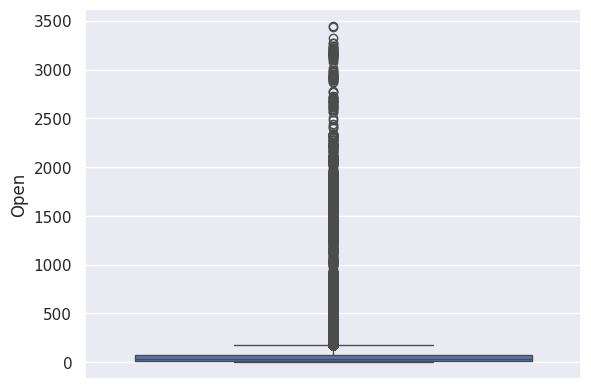

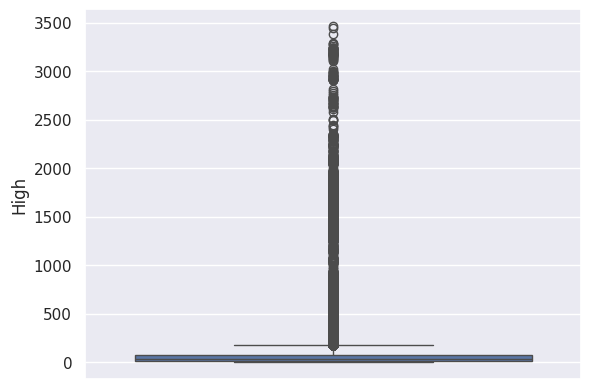

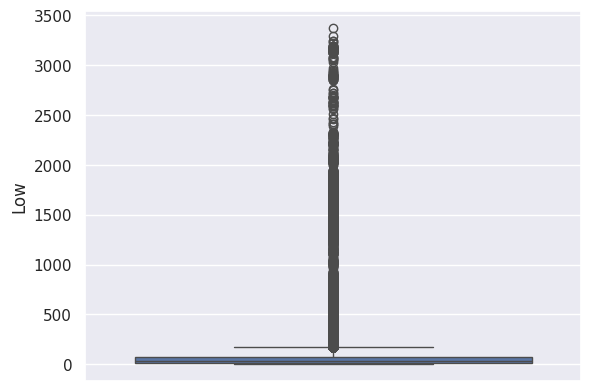

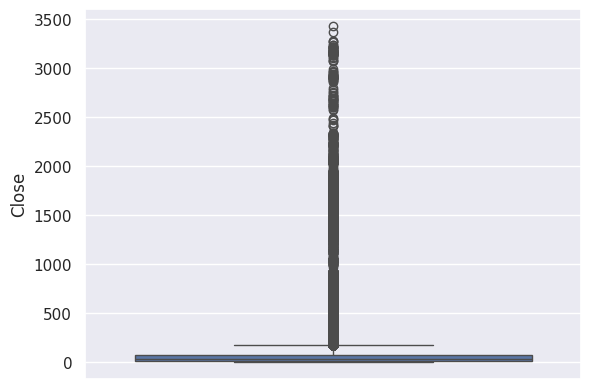

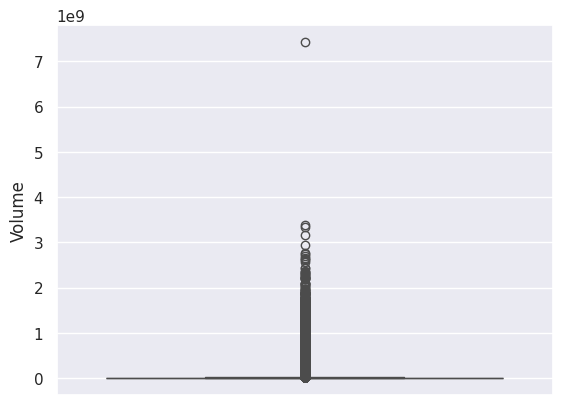

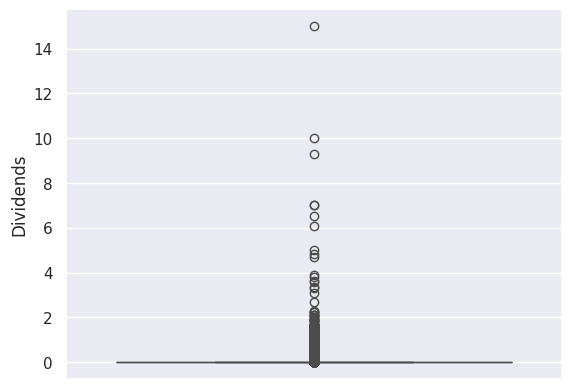

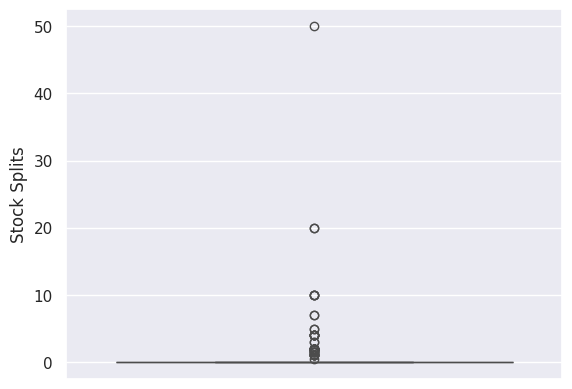

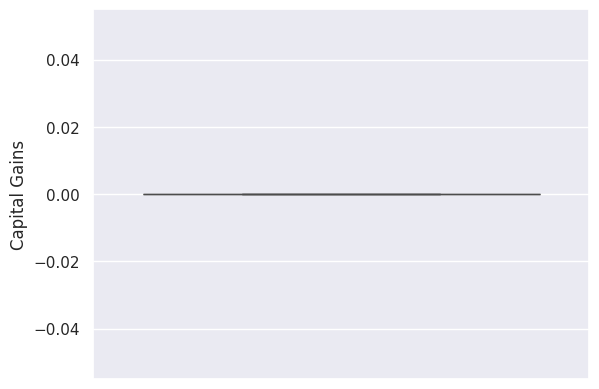

In [14]:
# Here I create a boxplot for each numeric feature
numeric_features =  ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits", "Capital Gains"]

for name in numeric_features:
    sns.boxplot(data=df, y=name)
    plt.show()

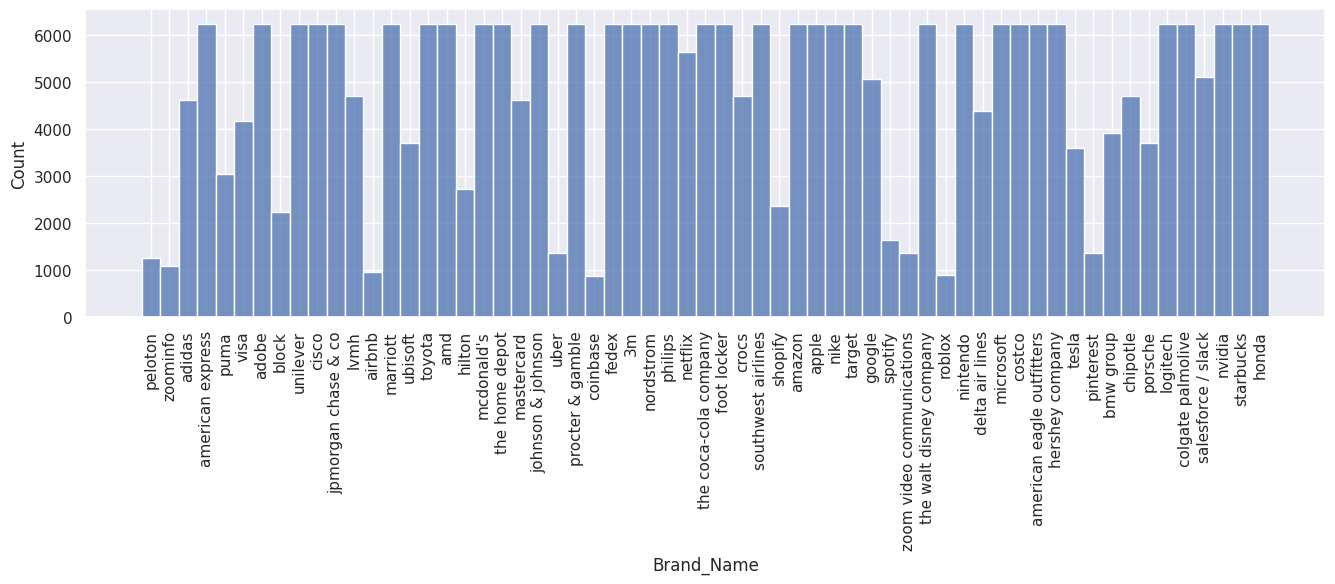

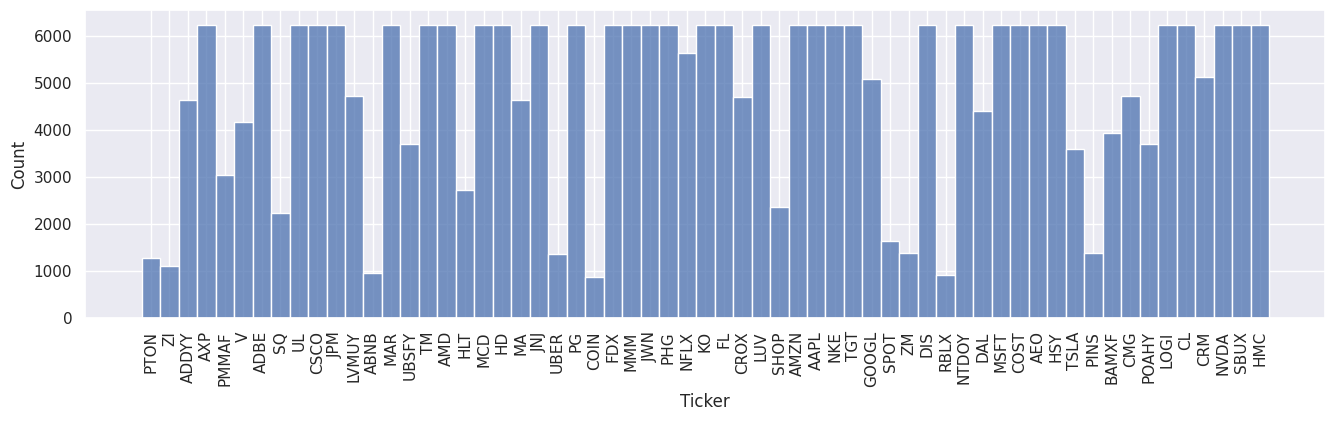

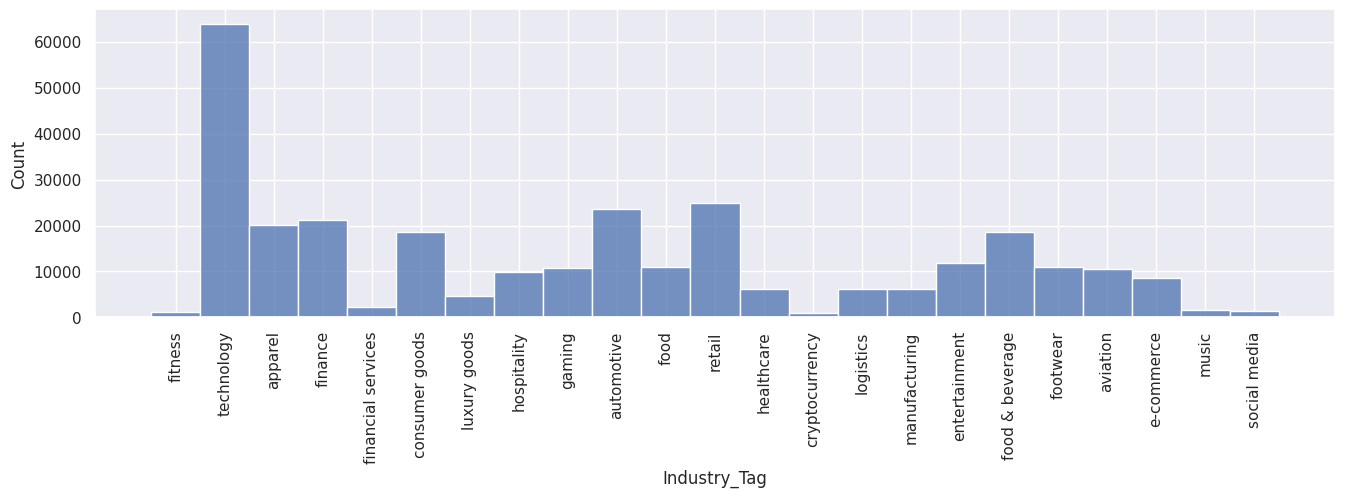

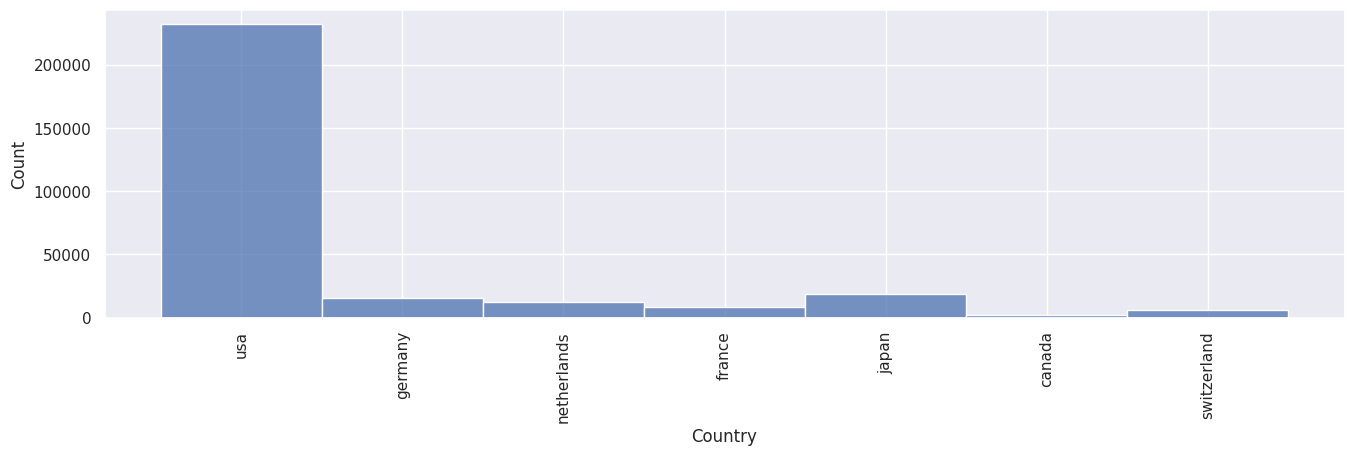

In [15]:
# Here I create a boxplot for each ceatogoric feature (this cell fails after renaming the features in the next cells)
categoric_features = ["Brand_Name",	"Ticker",	"Industry_Tag",	"Country"]

for name in categoric_features:
    plt.figure(figsize=(16, 4))
    sns.histplot(data=df, x=name)
    plt.xticks(rotation=90)
    plt.show()

### 2.2 Data Cleaning

#### Are my cells uniform?

I unifiy the names of all features (no capital letters, all words are connected by "_").

In [16]:
# rename the features
df.columns = df.columns.str.lower().str.replace(r'\s+|[-\s]', '_', regex=True)

#### Are there duplicates?

I remove rows which are duplicated and keep only one of the rows.

In [17]:
# What is the format of the feature "date"?
df.loc[0:6,"date"]

,date
0,2024-09-16 00:00:00-04:00
1,2024-09-16 00:00:00-04:00
2,2024-09-16 00:00:00-04:00
3,2024-09-16 00:00:00-04:00
4,2024-09-16 00:00:00-04:00
5,2024-09-16 00:00:00-04:00
6,2024-09-16 00:00:00-04:00


In [18]:
# Before I change the type of date from string to datetime, I check for the granularity of the dataset

df['date_for_check'] = df['date'].str[:10]
df['time_for_check'] = df['date'].str[11:]

grouped = df.groupby(["date_for_check", "brand_name"]).agg({"time_for_check": "count"})

# grouped_with_filter = grouped[grouped["time_for_check"] > 1]
# grouped_with_filter

filter = df.duplicated(subset=["date_for_check", "brand_name"], keep='first') # TODO: Haben wir in den Übungen irgendwie anders gelöst mit den Filtern damals

# I remove instances the appear multiple times
df.drop(index=df[filter].index, inplace=True)

# I remove column(s) that I don't need anymore
df = df.drop(columns=['date_for_check', 'time_for_check'])

#### Are there gaps in the time series? (TODO: Ist timeframe das richge "wording"?)

I don't fill the gaps and I dont delete the gaps as I want to maintain the original characteristics of the dataset and avoid introducing potential biases.

If gaps exist, I assume that it is due to the fact that stock exchanges are closed on weekends and and holidays. Other reasons could be possible as well.

In [19]:
# Convert 'date' to datetime and extract only the date part
df['date_for_check'] = pd.to_datetime(df['date'].str[:10])

# Count occurrences of each date directly
date_counts = df['date_for_check'].value_counts().sort_index().reset_index()

# Rename columns
date_counts.columns = ['date', 'count']

# Create a complete date range and ensure all dates are accounted for in the final DataFrame
date_counts = date_counts.set_index('date').reindex(pd.date_range(date_counts['date'].min(), date_counts['date'].max()), fill_value=0).rename_axis('date').reset_index()

# I remove column(s) that I don't need anymore
df = df.drop(columns=['date_for_check'])

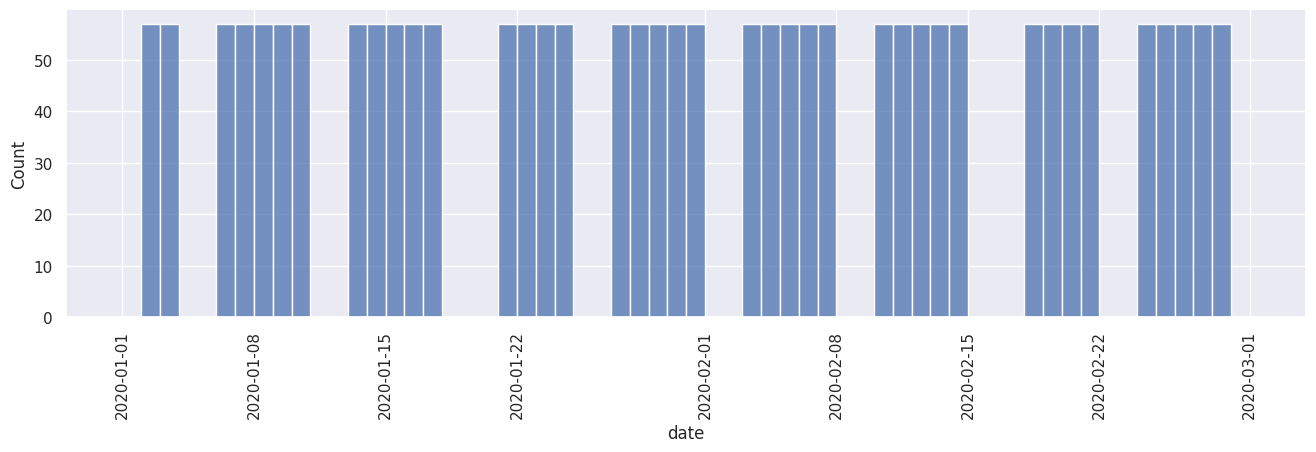

In [20]:
date_counts = date_counts.loc[(date_counts['date'] >= "2020-01-01") & (date_counts['date'] <= "2020-03-01")]

plt.figure(figsize=(16, 4))
sns.histplot(data = date_counts, x="date" ,binwidth=1, weights="count")
plt.xticks(rotation=90)
plt.show()

#### Feature Engineering for Data Analysis

In [21]:
# Transform data from string ti datetime
df['date'] = pd.to_datetime(df['date'].str[:10])


# add column for year, month and day
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"]= df["date"].dt.day

# Set data as index
df.set_index('date', inplace=True)

# reorder the features in a sensefull manner (first the dates, numrical data, finally categorical data)
df = df[["year", "month", "day", "open", "high", "low", "close", "volume", "dividends", "stock_splits", "capital_gains", "brand_name",	"ticker",	"industry_tag",	"country"]]

# delet features that I dont need
# df = df.drop(columns=['xyz', 'xyz']) #TODO: am Ende noch machen

#### Are there NAs?

In [22]:
df.isnull().sum()

,0
year,0
month,0
day,0
open,0
high,0
low,0
close,0
volume,0
dividends,0
stock_splits,0


### 2.3 Data Analysis (Kilian)

#### Individual stock assessment (of a randomly chosen stock)

In [23]:
filt = (df["brand_name"] == "microsoft")

# APPLY FILTER HERE.
df_windows = df.loc[filt]

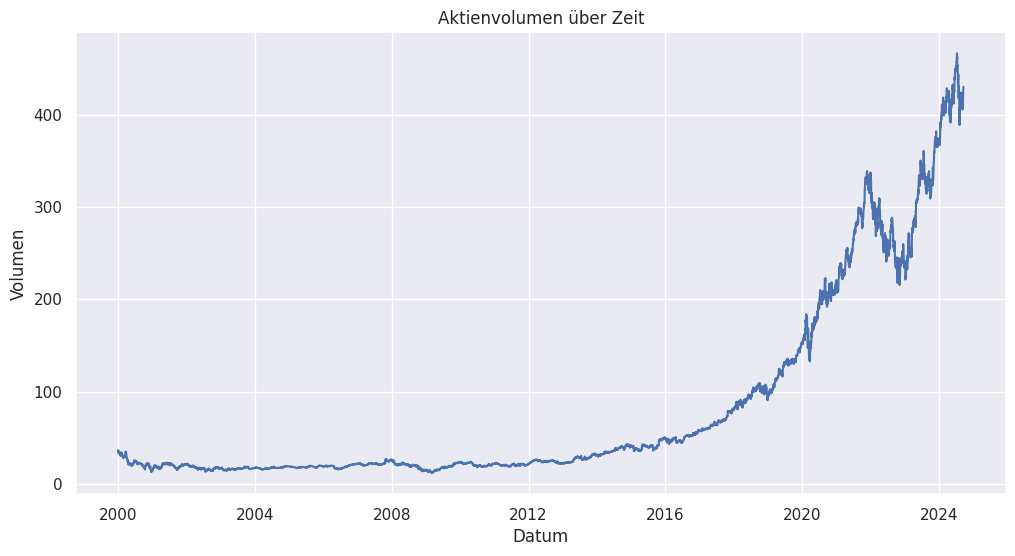

In [24]:
# Plot erstellen
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_windows, x='date', y='open')

# Achsen und Titel anpassen (TODO: anpassen)
plt.xlabel('Datum')
plt.ylabel('Volumen')
plt.title('Aktienvolumen über Zeit')

# Plot anzeigen
plt.show()

In [25]:
df_windows.reset_index(inplace=True)
df_melted = df_windows.melt(id_vars=['date'], value_vars=['close', 'open'], var_name='feature', value_name='value')
df_windows.set_index('date', inplace=True)

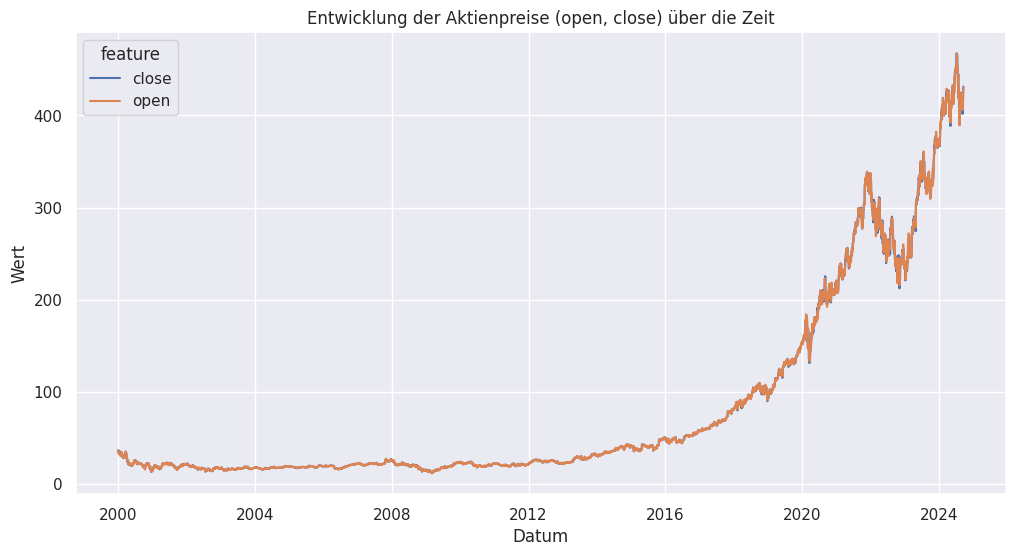

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='date', y='value', hue='feature')

# Achsen und Titel anpassen
plt.xlabel('Datum')
plt.ylabel('Wert')
plt.title('Entwicklung der Aktienpreise (open, close) über die Zeit')

# Plot anzeigen
plt.show()

In [27]:
df_windows.reset_index(inplace=True)
df_melted = df_windows.melt(id_vars=['date'], value_vars=['high', 'low'], var_name='feature', value_name='value')
df_windows.set_index('date', inplace=True)

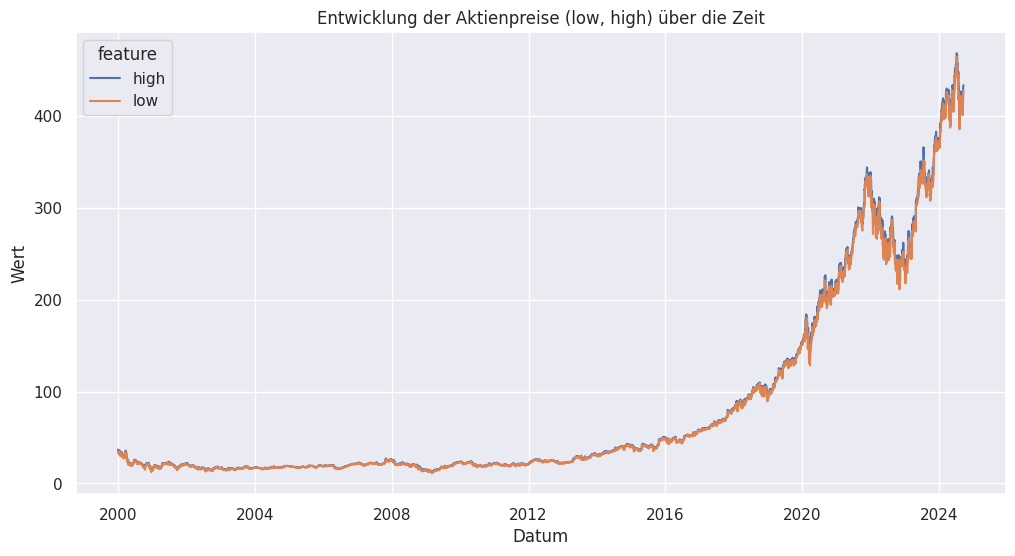

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='date', y='value', hue='feature')

# Achsen und Titel anpassen
plt.xlabel('Datum')
plt.ylabel('Wert')
plt.title('Entwicklung der Aktienpreise (low, high) über die Zeit')

# Plot anzeigen
plt.show()

#### Cumulative stock assessment

QUESTION 1: What is the accumulatie closing price by industry?

> Blockzitat einfügen



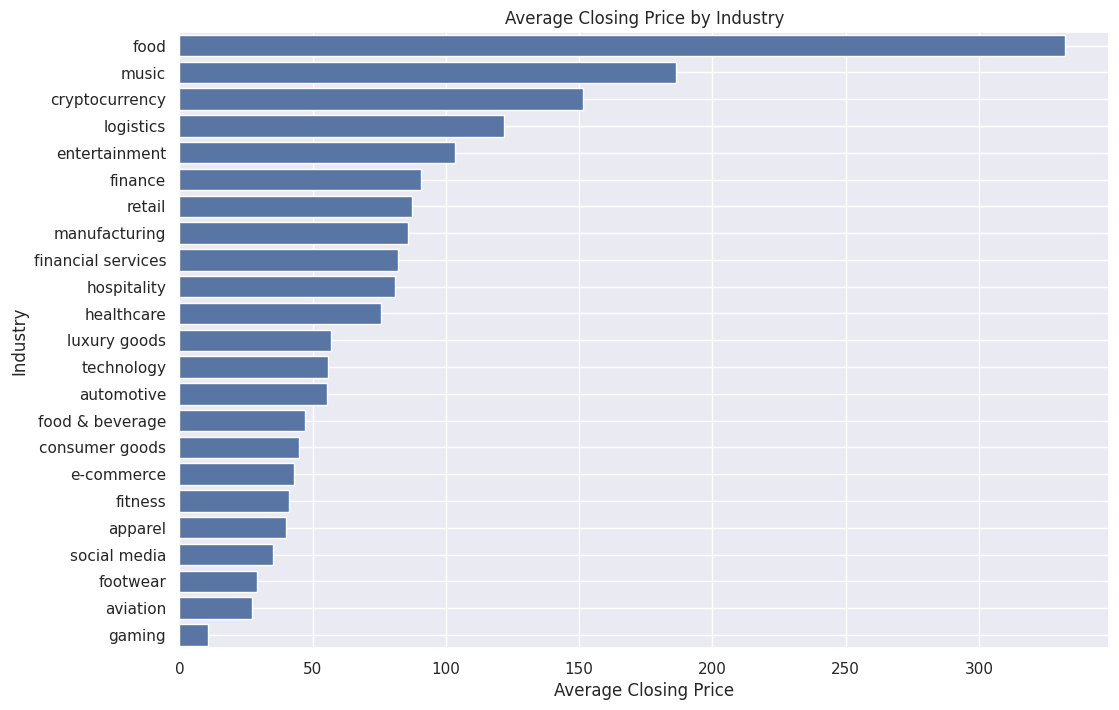

In [29]:
# Average closing price by industry
industry_avg = df.groupby('industry_tag')['close'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=industry_avg.values, y=industry_avg.index)
plt.title('Average Closing Price by Industry')
plt.xlabel('Average Closing Price')
plt.ylabel('Industry')
plt.grid(True)
plt.show()

QUESTION 2: What is the accumulatie closing price by industry over time?

---



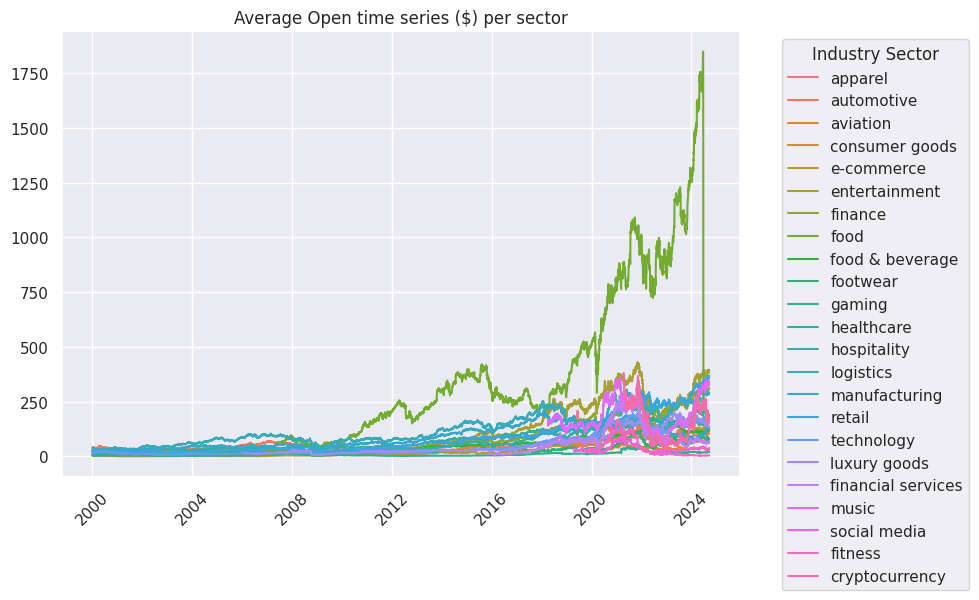

In [30]:
# Prepare the data
df.reset_index(inplace=True)
average_open_by_sector = df[['date', 'ticker', 'open', 'industry_tag']].groupby(['date', 'industry_tag'])[['open']].mean().reset_index()
df.set_index('date', inplace=True)

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_open_by_sector, x='date', y='open', hue='industry_tag')

# modify the plot
plt.title('Average Open time series ($) per sector')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Industry Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



QUESTION 3: WHat is the average closing price by country?

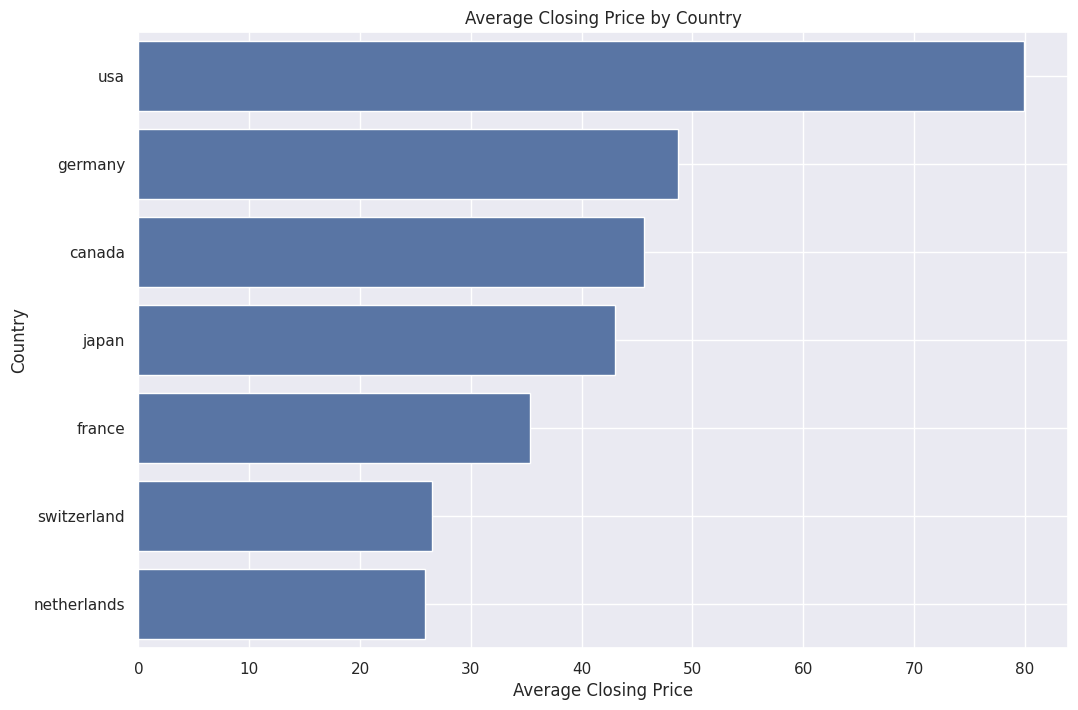

In [31]:
# Average closing price by country
country_avg = df.groupby('country')['close'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=country_avg.values, y=country_avg.index)
plt.title('Average Closing Price by Country')
plt.xlabel('Average Closing Price')
plt.ylabel('Country')
plt.grid(True)
plt.show()

Question 1: ...

2.3 Data Analysis (Ascan)



### 2.3 Data Analysis (Anahita)

Question 1: Which stocks or industries have shown the most consistent long-term growth?

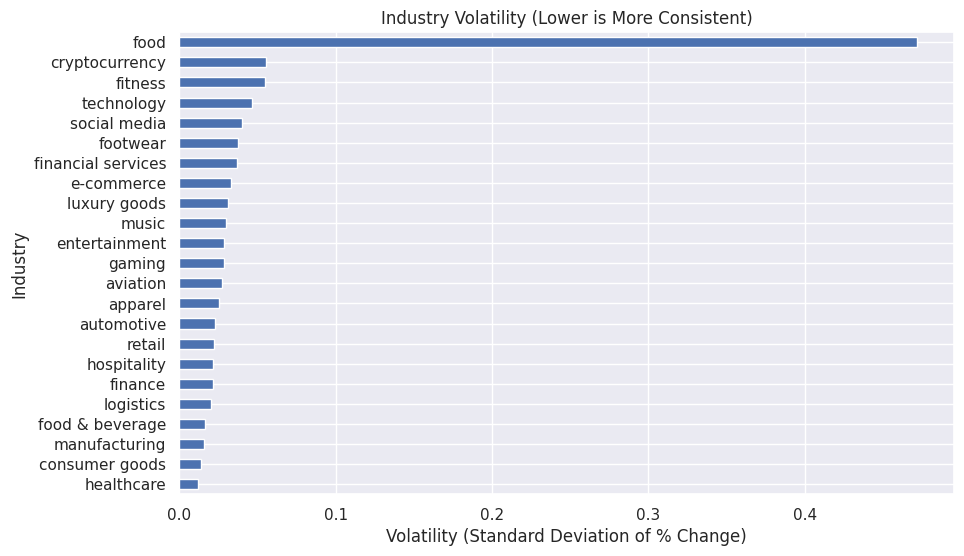

,Pct_Change
Industry_Tag,
healthcare,0.012139
consumer goods,0.014023
manufacturing,0.015768
food & beverage,0.016455
logistics,0.020029


In [39]:
#Question 1: 1.	Which stocks or industries have shown the most consistent long-term growth?

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/techlabs/data/World-Stock-Prices-Dataset.csv')

#The dataset contains the following columns:
#Date: The date of the stock data.
#Open: The opening price of the stock.
#High: The highest price of the stock during the day.
#Low: The lowest price of the stock during the day.
#Close: The closing price of the stock.
#Volume: The number of shares traded.
#Dividends: Any dividends paid.
#Stock Splits: Any stock splits that occurred.
#Brand_Name: The name of the brand/company.
#Ticker: The stock ticker symbol.
#Industry_Tag: The industry to which the stock belongs.
#Country: The country of the stock.
#Capital Gains: Information on capital gains.
#To determine which stocks or industries have shown the most consistent long-term growth, I used following 3 steps:

#1.Calculate the percentage change in the closing prices over time for each stock.
#2.Analyze the consistency of growth by examining the volatility (standard deviation) of the percentage changes.
#3.Aggregate the results by industry to identify the industries with the most consistent growth.

# Convert the 'Date' column to datetime format, specifying UTC
#UTC Conversion: By specifying utc=True, the pd.to_datetime() function converts all datetime values to UTC.
#This prevents issues with mixed time zones and silences the warning about future behavior changes.
data['Date'] = pd.to_datetime(data['Date'], utc=True)

# Calculate the percentage change in closing prices for each stock
data['Pct_Change'] = data.groupby('Ticker')['Close'].pct_change()

# Calculate the standard deviation of these percentage changes to assess consistency
stock_volatility = data.groupby('Ticker')['Pct_Change'].std()

# Merge this with the industry information
industry_volatility = data.groupby(['Industry_Tag'])['Pct_Change'].std().sort_values()

# Display the industries with the lowest volatility, indicating more consistent growth
industry_volatility = industry_volatility.dropna()

# Plot the results
plt.figure(figsize=(10, 6))
industry_volatility.plot(kind='barh', title='Industry Volatility (Lower is More Consistent)')
plt.xlabel('Volatility (Standard Deviation of % Change)')
plt.ylabel('Industry')
plt.show()

# Display the top consistent industries
industry_volatility.head()

Question 2: What are the top 10 most volatile industries?



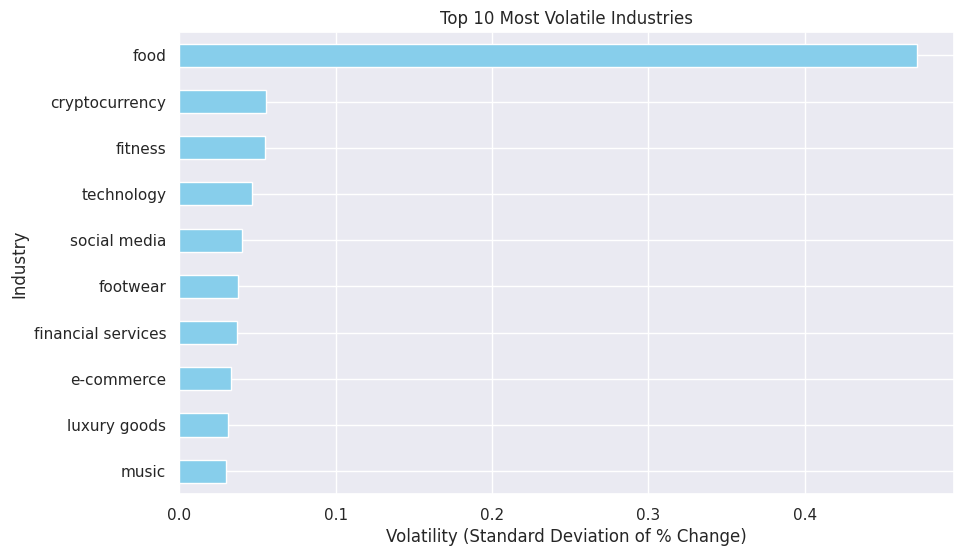

,Pct_Change
Industry_Tag,
food,0.472095
cryptocurrency,0.055266
fitness,0.054891
technology,0.046655
social media,0.040130
footwear,0.037303
financial services,0.037056
e-commerce,0.032842
luxury goods,0.031296


In [41]:
#Question 2: What are the top 10 most volatile industries?

#To answer the question about the top 10 most volatile industries, I'll analyze the dataset by calculating the standard deviation of the percentage changes in stock prices for each industry.
#Higher standard deviation indicates higher volatility. I'll then visualize the results with a bar chart.

import matplotlib.pyplot as plt

# Calculate the standard deviation of percentage changes to find volatility
#Volatility Calculation: The standard deviation of the percentage changes (Pct_Change) in stock prices is calculated for each industry using the 'groupby' and 'std' methods.
industry_volatility = data.groupby(['Industry_Tag'])['Pct_Change'].std().sort_values(ascending=False)

# Select the top 10 most volatile industries
# The top 10 industries with the highest volatility are selected by sorting the values in descending order and using head(10).
top_10_volatile_industries = industry_volatility.head(10)

# Plot the results
#The results are plotted as a horizontal bar chart with matplotlib.
#The y-axis is inverted (invert_yaxis) to show the most volatile industry at the top.
plt.figure(figsize=(10, 6))
top_10_volatile_industries.plot(kind='barh', color='skyblue', title='Top 10 Most Volatile Industries')
plt.xlabel('Volatility (Standard Deviation of % Change)')
plt.ylabel('Industry')
plt.gca().invert_yaxis()  # Invert y-axis to have the most volatile industry at the top
plt.show()

# Display the top 10 volatile industries
#The top 10 most volatile industries are also displayed in a table format.
top_10_volatile_industries

Question 3: How did the COVID-19 pandemic impact stock prices across the healthcare and aviation industries in the USA?

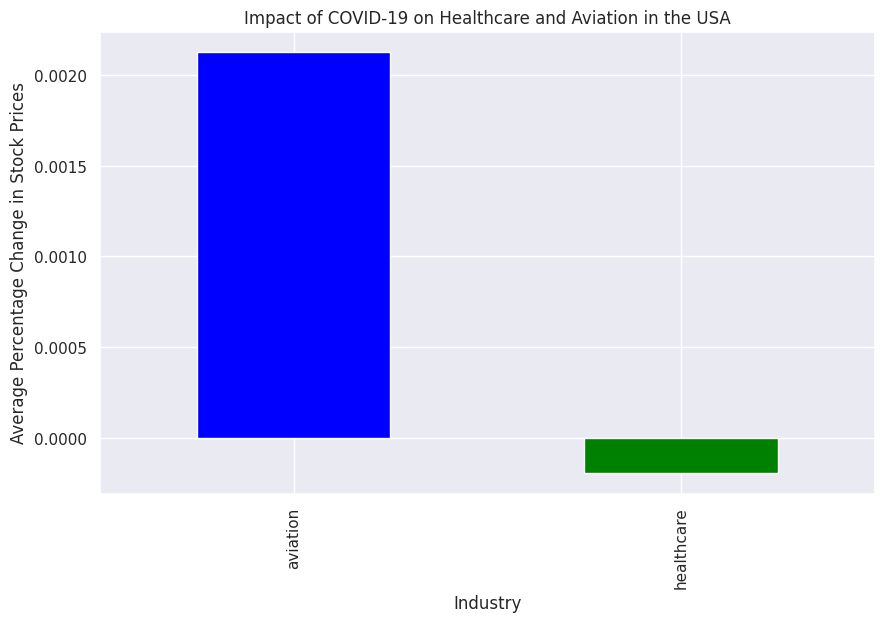

,Pct_Change_COVID
Industry_Tag,
aviation,0.002124
healthcare,-0.000192


In [42]:
#Question 3: How did the COVID-19 pandemic impact stock prices across the healthcare and aviation industries in the USA?

#I proceed with the following steps:
#1. Filter Data: Focus on the healthcare and aviation industries in the USA.
#2. Identify the COVID-19 Period: Analyze stock price changes from January 2020 to December 2020 to capture the pandemic's impact.
#3. Calculate Stock Price Changes: Compute the average percentage change in stock prices for each industry in both countries during the pandemic.
#4. Visualize the Results: Create visualizations to compare the impacts across the different industries in USA.

import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format, specifying UTC
data['Date'] = pd.to_datetime(data['Date'], utc=True)

# Filter data for the healthcare and aviation industries in the USA
usa_data = data[
    (data['Industry_Tag'].isin(['healthcare', 'aviation'])) &
    (data['Country'] == 'usa')
].copy()  # Explicitly create a copy to avoid the SettingWithCopyWarning

# Focus on the period from January 2020 to December 2020 to capture the impact of the pandemic
covid_period = usa_data[
    (usa_data['Date'] >= '2020-01-01') &
    (usa_data['Date'] <= '2020-12-31')
].copy()  # Explicitly create a copy to avoid the SettingWithCopyWarning

# Calculate the percentage change in closing prices during the COVID-19 period
covid_period['Pct_Change_COVID'] = covid_period.groupby(['Ticker'])['Close'].pct_change()

# Aggregate the data by industry to get the average percentage change
industry_impact = covid_period.groupby('Industry_Tag')['Pct_Change_COVID'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
industry_impact.plot(kind='bar', color=['blue', 'green'], title='Impact of COVID-19 on Healthcare and Aviation in the USA')
plt.ylabel('Average Percentage Change in Stock Prices')
plt.xlabel('Industry')
plt.show()

industry_impact

#Analysis:
#Aviation Industry:
#Positive Impact: The analysis indicates that the aviation industry in the USA experienced a small positive average percentage change in stock prices during the COVID-19 pandemic.
#Resilience or Recovery: This slight increase might suggest that, despite the initial severe impacts of the pandemic on air travel, the industry showed some resilience or recovery as the year progressed.

#Healthcare Industry:
#Slight Negative Impact: The healthcare industry in the USA saw a very slight negative average percentage change in stock prices during the same period.
#Stability: The minimal change in healthcare stock prices could indicate stability within the sector.
#While some segments of the healthcare industry (like pharmaceuticals) may have seen gains, others might have faced challenges, leading to an overall balanced impact.
#Overall Interpretation:
#Sector-Specific Impacts: The analysis highlights that the pandemic had different effects on different industries.
#While the aviation industry, heavily impacted early in the pandemic, showed signs of a slight positive change.
#the healthcare industry remained relatively stable with a minor decline.
#Economic Implications: This information could be useful for investors or policymakers to understand how different sectors respond to global crises like pandemics.
#It shows the importance of sector-specific strategies in managing economic impacts during such events.

### 2.3 Data Analysis (Minh)

In [43]:
#download Minh_df


Minh_df = pd.read_csv("/content/drive/MyDrive/techlabs/data/World-Stock-Prices-Dataset.csv")


Question 1: What are the stocks of the dataset?

In [48]:
#Liste aller Aktien
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
all_stocks = Minh_df[['Brand_Name', 'Ticker']].drop_duplicates()
print(all_stocks)

                   Brand_Name Ticker
0                     peloton   PTON
1                      toyota     TM
2                      adidas  ADDYY
3            american express    AXP
4                        puma  PMMAF
5                        visa      V
6                       adobe   ADBE
7                       block     SQ
8                    unilever     UL
9                       cisco   CSCO
10        jpmorgan chase & co    JPM
11                       lvmh  LVMUY
12                     airbnb   ABNB
13                   marriott    MAR
14                   zoominfo     ZI
15                     hilton    HLT
16                        amd    AMD
17                 mcdonald's    MCD
18             the home depot     HD
19                 mastercard     MA
20          johnson & johnson    JNJ
21                       uber   UBER
22           procter & gamble     PG
23                   coinbase   COIN
24                      fedex    FDX
25                         3m    MMM
2

Questions 2: From which countries are the stocks?

In [47]:
# Gruppiere nach 'Country' und hole die eindeutigen Ticker pro Land
country_stocks = Minh_df.groupby('Country')['Ticker'].unique()

# Erstelle ein Dictionary mit der Struktur {Country: Ticker1, Ticker2, ...}
country_stock_dict = {country: ','.join(tickers) for country, tickers in country_stocks.items()}

# Ausgabe der Ergebnisse im gewünschten Format
for country, tickers in country_stock_dict.items():
    print(f"{country}: {tickers}")

canada: SHOP
france: LVMUY,UBSFY
germany: ADDYY,PMMAF,BAMXF,POAHY
japan: TM,NTDOY,HMC
netherlands: UL,PHG
switzerland: LOGI
usa: PTON,AXP,V,ADBE,SQ,CSCO,JPM,ABNB,MAR,ZI,HLT,AMD,MCD,HD,MA,JNJ,UBER,PG,COIN,FDX,MMM,JWN,FL,NFLX,KO,CROX,LUV,AMZN,AAPL,NKE,TGT,GOOGL,SPOT,ZM,DIS,RBLX,DAL,MSFT,COST,AEO,HSY,TSLA,PINS,CMG,CL,CRM,NVDA,SBUX


Question 4: From which industries are the stocks?

In [49]:
# Gruppiere die Ticker nach Branche
industry_stocks = Minh_df.groupby('Industry_Tag')['Ticker'].unique()

# Erstelle das Format "Industry: Ticker1,Ticker2,Ticker3"
industry_stock_lists = [f"{industry}: {', '.join(stocks)}" for industry, stocks in industry_stocks.items()]

# Ausgabe der Ergebnisse
for entry in industry_stock_lists:
    print(entry)


apparel: ADDYY, PMMAF, NKE, AEO
automotive: TM, TSLA, BAMXF, POAHY, HMC
aviation: LUV, DAL
consumer goods: UL, PG, CL
cryptocurrency: COIN
e-commerce: SHOP, AMZN
entertainment: NFLX, DIS
finance: AXP, V, JPM, MA
financial services: SQ
fitness: PTON
food: MCD, CMG
food & beverage: KO, HSY, SBUX
footwear: FL, CROX
gaming: UBSFY, RBLX, NTDOY
healthcare: JNJ
hospitality: ABNB, MAR, HLT
logistics: FDX
luxury goods: LVMUY
manufacturing: MMM
music: SPOT
retail: HD, JWN, TGT, COST
social media: PINS
technology: ADBE, CSCO, ZI, AMD, UBER, PHG, AAPL, GOOGL, ZM, MSFT, LOGI, CRM, NVDA


Question 5: Which stocks have payed dividends at least once?

In [50]:
# Filtern der Aktien, die jemals Dividenden gezahlt haben (Dividendenwert > 0)
stocks_with_dividends = Minh_df[Minh_df['Dividends'] > 0]
stocks_with_dividends_list = sorted(stocks_with_dividends["Brand_Name"].unique().tolist())
for stock in stocks_with_dividends_list:
    print(stock)

3m
adidas
adobe
american eagle outfitters
american express
apple
bmw group
cisco
colgate palmolive
costco
delta air lines
fedex
foot locker
google
hershey company
hilton
honda
johnson & johnson
jpmorgan chase & co
logitech
lvmh
marriott
mastercard
mcdonald's
microsoft
nike
nintendo
nordstrom
nvidia
philips
porsche
procter & gamble
puma
salesforce / slack
southwest airlines
starbucks
target
the coca-cola company
the home depot
the walt disney company
toyota
ubisoft
unilever
visa


Question 6: Which stocks have never payed dividends?

In [51]:
#Filtern, der Aktien, die noch nie Aktien gezahlt haben
all_stocks = Minh_df["Brand_Name"].unique()
stocks_without_dividends_list = sorted(set(all_stocks) - set(stocks_with_dividends_list))
for stock in stocks_without_dividends_list:
    print(stock)

airbnb
amazon
amd
block
chipotle
coinbase
crocs
netflix
peloton
pinterest
roblox
shopify
spotify
tesla
uber
zoom video communications
zoominfo


Question 7: Which stocks had a stock split in the past?

In [52]:
stocks_with_splits = Minh_df[Minh_df['Stock Splits'] > 0]
stocks_with_splits_list = sorted(stocks_with_splits["Brand_Name"].unique().tolist())
for stock in stocks_with_splits_list:
    print(stock)

3m
adidas
adobe
amazon
amd
american eagle outfitters
american express
apple
chipotle
cisco
colgate palmolive
costco
crocs
google
hershey company
hilton
honda
johnson & johnson
jpmorgan chase & co
logitech
marriott
mastercard
microsoft
netflix
nike
nintendo
nordstrom
nvidia
philips
procter & gamble
puma
salesforce / slack
shopify
southwest airlines
starbucks
target
tesla
the coca-cola company
the walt disney company
unilever
visa


Question 8: Which stocks have never had a stock split?

In [53]:
stocks_without_splits_list = sorted(set(all_stocks) - set(stocks_with_splits_list))
for stock in stocks_without_splits_list:
    print(stock)

airbnb
block
bmw group
coinbase
delta air lines
fedex
foot locker
lvmh
mcdonald's
peloton
pinterest
porsche
roblox
spotify
the home depot
toyota
uber
ubisoft
zoom video communications
zoominfo


Question 9: What are the dividend yields of the stocks?

In [54]:
# Konvertiere die 'Date'-Spalte zu einem datetime-Format mit Zeitzoneninformationen
Minh_df['Date'] = pd.to_datetime(Minh_df['Date'], utc=True)

# Aktuellstes Datum im Datensatz ermitteln
latest_date = Minh_df['Date'].max()

# Zeitraum der letzten 12 Monate berechnen
last_12_months = latest_date - pd.DateOffset(months=12)

# Daten für die letzten 12 Monate filtern
last_12_months_data = Minh_df[Minh_df['Date'] >= last_12_months]

# Berechnung der Dividendenrendite für jede Aktie (unter Berücksichtigung von Brand_Name und Ticker)
dividend_yield_df = last_12_months_data.groupby(['Brand_Name', 'Ticker']).agg(
    last_close=('Close', 'last'),
    total_dividends=('Dividends', 'sum')
).reset_index()

# Dividendenrendite berechnen
dividend_yield_df['dividend_yield'] = (dividend_yield_df['total_dividends'] / dividend_yield_df['last_close']) * 100

# Sortieren der Liste nach Dividendenrendite
dividend_yield_df_sorted = dividend_yield_df.sort_values(by='dividend_yield', ascending=False)

# Ausgabe der Tabelle mit Brand_Name, Ticker, last_close, total_dividends und dividend_yield
print(dividend_yield_df_sorted)


                   Brand_Name Ticker   last_close  total_dividends  \
10                  bmw group  BAMXF   107.500000            6.532   
40                    porsche  POAHY     5.240000            0.277   
35                  nordstrom    JWN    15.540000            0.760   
0                          3m    MMM   104.120003            4.410   
15                     costco   COST   536.190002           19.360   
57                   unilever     UL    51.099998            1.845   
49                     target    TGT   123.430000            4.420   
51      the coca-cola company     KO    60.560001            1.890   
25        jpmorgan chase & co    JPM   147.559998            4.400   
24          johnson & johnson    JNJ   164.289993            4.860   
6   american eagle outfitters    AEO    16.400000            0.475   
12                      cisco   CSCO    56.200001            1.580   
52             the home depot     HD   323.842010            8.680   
14          colgate 

Question 10: Which stocks have a dividend yield of min x%?

In [55]:
# Eingabe des gewünschten Minimums an Dividendenrendite
target_yield = float(input("Bitte Minimum an Dividendenrendite angeben: "))

# Filtere die Aktien basierend auf der Dividendenrendite
dividends_stock_list = dividend_yield_df_sorted[dividend_yield_df_sorted["dividend_yield"] >= target_yield]

# Ausgabe der gefilterten Liste mit Brand_Name und dividend_yield
print(dividends_stock_list[["Brand_Name", "dividend_yield"]])

# Erstelle eine Liste der zugehörigen Ticker-Symbole
tickers = dividends_stock_list["Ticker"].unique()

# Verbinde die Ticker-Symbole mit Kommas und gebe das Ergebnis in der gewünschten Struktur aus
tickers_output = ', '.join(tickers)
print(f"{target_yield}: {tickers_output}")

Bitte Minimum an Dividendenrendite angeben: 5
   Brand_Name  dividend_yield
10  bmw group        6.076279
40    porsche        5.286260
5.0: BAMXF, POAHY


Question 11: What are the dividends of the last 5 periods?

In [56]:
# Filtere die Zeilen mit Dividenden > 0
df_filtered = Minh_df[Minh_df['Dividends'] > 0].copy()

# Bestimme die Periodenendpunkte (6 Endpunkte für 5 Perioden)
period_end_dates = [latest_date - pd.DateOffset(years=i) for i in range(6)]

# Zuweise die Perioden basierend auf den Endpunkten, füge eine Rückfallebene für nicht zugeordnete Fälle hinzu
def assign_period(date, period_end_dates):
    for i in range(len(period_end_dates) - 1):
        if period_end_dates[i + 1] < date <= period_end_dates[i]:
            return i
    return -1  # Rückfallebene, falls das Datum keiner Periode zugeordnet werden kann

# Wende die Periodenzuordnung an
df_filtered['Period'] = df_filtered['Date'].apply(assign_period, period_end_dates=period_end_dates)

# Entferne die Zeilen, bei denen die Periode -1 ist (d.h., kein gültiger Zeitraum zugewiesen wurde)
df_filtered = df_filtered[df_filtered['Period'] != -1]

# Aggregiere die Dividenden für jede 12-Monats-Periode pro Aktie
periodic_dividends = df_filtered.groupby(['Brand_Name','Ticker', 'Period']).agg(total_dividends=('Dividends', 'sum')).reset_index()

# Pivot-Tabelle erstellen und Periodenreihenfolge ändern
dividends_last_5_periods = periodic_dividends.pivot(index=['Brand_Name', 'Ticker'], columns='Period', values='total_dividends').fillna(0)
dividends_last_5_periods = dividends_last_5_periods[[4, 3, 2, 1, 0]]

# Umbenennen der Perioden
dividends_last_5_periods.columns = ['07/2019-07/2020', '07/2020-07/2021', '07/2021-07/2022', '07/2022-07/2023', '07/2023-07/2024']

# Ausgabe der Tabelle
print(dividends_last_5_periods)



                                  07/2019-07/2020  07/2020-07/2021  \
Brand_Name                Ticker                                     
3m                        MMM               5.850            5.910   
adidas                    ADDYY             0.000            1.775   
american eagle outfitters AEO               0.276            0.456   
american express          AXP               1.720            1.720   
apple                     AAPL              0.795            0.850   
bmw group                 BAMXF             2.701            2.295   
cisco                     CSCO              1.420            1.460   
colgate palmolive         CL                1.740            1.780   
costco                    COST              3.350           12.980   
delta air lines           DAL               0.806            0.000   
fedex                     FDX               2.600            2.700   
foot locker               FL                1.160            0.700   
google              

Question 12: What are the average dividend growth rates?

In [57]:
# Berechne die Wachstumsraten zwischen den Perioden
def calculate_growth_rates(row):
    growth_rates = []
    for i in range(4):  # Wir haben 5 Perioden, also 4 Wachstumsraten
        if row.iloc[i] != 0 and row.iloc[i+1] != 0:  # Vermeide Division durch 0
            growth_rate = (row.iloc[i+1] / row.iloc[i]) - 1
            growth_rates.append(growth_rate)
    return growth_rates

# Berechne das geometrische Mittel der Wachstumsraten
def geometric_mean_growth(growth_rates):
    if len(growth_rates) > 0:
        return np.prod([1 + rate for rate in growth_rates])**(1/len(growth_rates)) - 1
    else:
        return np.nan  # Falls keine Wachstumsraten vorhanden sind

# Anwenden der Berechnungen auf jede Aktie
dividends_last_5_periods['growth_rates'] = dividends_last_5_periods.apply(calculate_growth_rates, axis=1)
dividends_last_5_periods['avg_growth'] = dividends_last_5_periods['growth_rates'].apply(geometric_mean_growth)



# Ausgabe der Tabelle mit den Tickern und dem durchschnittlichen Dividendenwachstum
print(dividends_last_5_periods[['avg_growth']])


                                  avg_growth
Brand_Name                Ticker            
3m                        MMM      -0.068204
adidas                    ADDYY    -0.402304
american eagle outfitters AEO       0.145371
american express          AXP       0.108820
apple                     AAPL     -0.021099
bmw group                 BAMXF     0.247040
cisco                     CSCO      0.027051
colgate palmolive         CL        0.030212
costco                    COST      0.550476
delta air lines           DAL       2.500000
fedex                     FDX       0.186914
foot locker               FL       -0.233697
google                    GOOGL          NaN
hershey company           HSY       0.141476
hilton                    HLT       0.414214
honda                     HMC      -0.234102
johnson & johnson         JNJ       0.055207
jpmorgan chase & co       JPM       0.051447
logitech                  LOGI      0.102110
lvmh                      LVMUY     0.079899
marriott  

Question 13: Which stocks have an average dividend growth rate of min x%?


In [58]:
# Überprüfe, ob die Spalte 'Ticker' bereits existiert, und entferne sie, um Konflikte zu vermeiden
if 'Ticker' in dividends_last_5_periods.columns:
    dividends_last_5_periods = dividends_last_5_periods.drop(columns=['Ticker'])

# Setze den Index zurück, ohne die Index-Spalten zu löschen
dividends_last_5_periods_reset = dividends_last_5_periods.reset_index(drop=False)

# Eingabe des gewünschten Minimums an Dividendenwachstum
target_growth_rate = float(input("Bitte Minimum an Dividendenwachstum angeben (in Dezimalform, z.B. 0.05 für 5%): "))

# Filtere die Aktien basierend auf der Wachstumsrate
filtered_stocks = dividends_last_5_periods_reset[dividends_last_5_periods_reset['avg_growth'] >= target_growth_rate]

# Erstelle eine Liste der zugehörigen Ticker-Symbole als Strings
tickers = filtered_stocks['Ticker'].astype(str).unique()

# Verbinde die Ticker-Symbole mit Kommas und gebe das Ergebnis in der gewünschten Struktur aus
tickers_output = ', '.join(tickers)
print(f"{target_growth_rate}: {tickers_output}")

Bitte Minimum an Dividendenwachstum angeben (in Dezimalform, z.B. 0.05 für 5%): 0.07
0.07: AEO, AXP, BAMXF, COST, DAL, FDX, HSY, HLT, LOGI, LVMUY, MAR, MA, MCD, MSFT, JWN, PMMAF, LUV, SBUX, TGT, HD, V


Question 14: What's the average volatility of the stocks?

In [59]:
#Volatilität
# Berechne die tägliche Rendite als prozentuale Änderung des Schlusskurses
Minh_df['Daily_Return'] = Minh_df.groupby('Ticker')['Close'].pct_change()

# Berechne die Volatilität (Standardabweichung der täglichen Rendite) für jede Aktie
volatility = Minh_df.groupby(['Ticker', 'Brand_Name'])['Daily_Return'].std().reset_index()

# Sortiere die Aktien nach Volatilität aufsteigend
volatility_sorted = volatility.sort_values(by='Daily_Return')

# Zeige die sortierte Liste an
print(volatility_sorted)

   Ticker                 Brand_Name  Daily_Return
25    JNJ          johnson & johnson      0.012139
28     KO      the coca-cola company      0.012965
9      CL          colgate palmolive      0.013522
41     PG           procter & gamble      0.013750
24    HSY            hershey company      0.014173
34    MCD                 mcdonald's      0.014480
57     UL                   unilever      0.014769
35    MMM                         3m      0.015768
53     TM                     toyota      0.016417
12   COST                     costco      0.017367
22    HLT                     hilton      0.018048
58      V                       visa      0.018210
23    HMC                      honda      0.018245
20  GOOGL                     google      0.019114
36   MSFT                  microsoft      0.019122
17    DIS    the walt disney company      0.019322
21     HD             the home depot      0.019404
38    NKE                       nike      0.019537
18    FDX                      

Question 15: Which stocks have a volatility range between x und y?

In [ ]:
min_volatility = float(input("Bitte gebe einen Wert für die minimale Volatilität ein: "))
max_volatility = float(input("Bitte gebe einen Wert für die maximale Volatilität ein: "))

# Filtere die Aktien, deren Volatilität innerhalb der vorgegebenen Spannweite liegt
filtered_volatility = volatility_sorted[
    (volatility_sorted['Daily_Return'] >= min_volatility) &
    (volatility_sorted['Daily_Return'] <= max_volatility)
]

# Erstelle eine Liste der zugehörigen Ticker-Symbole
tickers = filtered_volatility['Ticker'].unique()

# Verbinde die Ticker-Symbole mit Kommas und gebe das Ergebnis in der gewünschten Struktur aus
tickers_output = ', '.join(tickers)
output_message = f"Für gewünschte Volatilität von {min_volatility} bis {max_volatility}: {tickers_output}"

# Zeige die Nachricht an
print(output_message)

Portfolio Simulator (Dividends not reinvested)

In [ ]:
#Kurssimulation ohne reinvestierten Dividenden


# Datumsspalte in datetime umwandeln und Zeitzoneninformationen entfernen
Minh_df['Date'] = pd.to_datetime(Minh_df['Date'], utc=True).dt.tz_convert(None)

# Anzahl der Portfolios eingeben
num_portfolios = int(input("Wie viele Portfolios möchten Sie anlegen? "))

# Eingabe des Start- und Enddatums
start_date_str = input("Geben Sie das Startdatum der Simulation ein (YYYY-MM-DD): ")
end_date_str = input("Geben Sie das Enddatum der Simulation ein (YYYY-MM-DD): ")

# Konvertierung der Eingabe in datetime-Objekte
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

# Portfolios initialisieren
portfolios = {}

for i in range(num_portfolios):
    portfolio_name = input(f"Geben Sie den Namen für Portfolio {i + 1} ein: ")
    tickers = input(f"Geben Sie die Ticker-Symbole für {portfolio_name} ein (getrennt durch Kommata): ").split(',')
    weight_type = input("Möchten Sie Ihr Portfolio gleichgewichten (G) oder individuell gewichten (I)? ").strip().upper()

    if weight_type == 'I':
        weights = []
        for ticker in tickers:
            weight = float(input(f"Geben Sie das Gewicht für {ticker} in Prozent ein (z.B. 20 für 20%): ")) / 100
            weights.append(weight)
        portfolios[portfolio_name] = {
            'tickers': [ticker.strip().upper() for ticker in tickers],  # Tickers aufräumen und Großbuchstaben verwenden
            'weights': weights
        }
    else:
        # Gleichgewichtung
        portfolios[portfolio_name] = {
            'tickers': [ticker.strip().upper() for ticker in tickers],
            'weights': [1/len(tickers)] * len(tickers)
        }

# Ergebnis-DataFrame initialisieren
results = pd.DataFrame()

# Schleife über jedes Portfolio
for portfolio_name, portfolio_info in portfolios.items():
    tickers = portfolio_info['tickers']
    weights = portfolio_info['weights']

    # Filtere die Daten für die ausgewählten Aktien und den Zeitraum
    filtered_data = Minh_df[(Minh_df['Ticker'].isin(tickers)) &
                            (Minh_df['Date'] >= start_date) &
                            (Minh_df['Date'] <= end_date)]

    # Sortiere nach Datum und Ticker
    filtered_data = filtered_data.sort_values(by=['Date', 'Ticker'])

    # Berechne die Anzahl der Aktien, die zum Startdatum gekauft werden
    initial_prices = filtered_data[filtered_data['Date'] == filtered_data['Date'].min()].set_index('Ticker')['Close']
    shares_owned = (100000 * pd.Series(weights, index=tickers)) / initial_prices

    # Berechne den Portfolio-Wert über den Zeitraum, berücksichtige Stock Splits
    portfolio_values = []

    for date, group in filtered_data.groupby('Date'):
        # Überprüfe auf Stock Splits und aktualisiere die Anzahl der Aktien entsprechend
        for ticker in tickers:
            stock_split = group[group['Ticker'] == ticker]['Stock Splits'].values
            if len(stock_split) > 0 and stock_split[0] > 0:  # Wenn ein Stock Split stattgefunden hat
                shares_owned[ticker] *= stock_split[0]  # Erhöhe die Anzahl der Aktien entsprechend dem Split-Verhältnis

        # Berechne den aktuellen Portfolio-Wert
        current_prices = group.set_index('Ticker')['Close']
        portfolio_value = (shares_owned * current_prices).sum()
        portfolio_values.append({'Date': date, 'Portfolio Value': portfolio_value})

    # DataFrame für das aktuelle Portfolio erstellen und zum Ergebnis hinzufügen
    portfolio_df = pd.DataFrame(portfolio_values)

    # Sicherstellen, dass die 'Date'-Spalte als Index gesetzt wird
    if 'Date' in portfolio_df.columns:
        portfolio_df.set_index('Date', inplace=True)
    else:
        print(f"Fehler: Die 'Date'-Spalte ist nicht im DataFrame für {portfolio_name} vorhanden.")

    # Berechne die prozentuale Veränderung relativ zum Startwert
    portfolio_df[f'{portfolio_name} Pct Change'] = (portfolio_df['Portfolio Value'] / portfolio_df['Portfolio Value'].iloc[0] - 1) * 100

    # Füge die prozentuale Veränderung zu den Ergebnissen hinzu
    if results.empty:
        results = portfolio_df[[f'{portfolio_name} Pct Change']]
    else:
        results = results.join(portfolio_df[[f'{portfolio_name} Pct Change']])

# Performance anzeigen für alle Portfolios
plt.figure(figsize=(12, 6))
for portfolio_name in portfolios.keys():
    plt.plot(results.index, results[f'{portfolio_name} Pct Change'], label=portfolio_name)

plt.title('Portfolio Performance Over Time (Percentage Change)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()


Portfolio Simulator (Dividends reinvested)

In [ ]:
# Datumsspalte in datetime umwandeln und Zeitzoneninformationen entfernen
Minh_df['Date'] = pd.to_datetime(Minh_df['Date'], utc=True).dt.tz_convert(None)

# Anzahl der Portfolios eingeben
num_portfolios = int(input("Wie viele Portfolios möchten Sie anlegen? "))

# Eingabe des Start- und Enddatums
start_date_str = input("Geben Sie das Startdatum der Simulation ein (YYYY-MM-DD): ")
end_date_str = input("Geben Sie das Enddatum der Simulation ein (YYYY-MM-DD): ")

# Konvertierung der Eingabe in datetime-Objekte
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

# Portfolios initialisieren
portfolios = {}

for i in range(num_portfolios):
    portfolio_name = input(f"Geben Sie den Namen für Portfolio {i + 1} ein: ")
    tickers = input(f"Geben Sie die Ticker-Symbole für {portfolio_name} ein (getrennt durch Kommata): ").split(',')
    weight_type = input("Möchten Sie Ihr Portfolio gleichgewichten (G) oder individuell gewichten (I)? ").strip().upper()

    if weight_type == 'I':
        weights = []
        for ticker in tickers:
            weight = float(input(f"Geben Sie das Gewicht für {ticker} in Prozent ein (z.B. 20 für 20%): ")) / 100
            weights.append(weight)
        portfolios[portfolio_name] = {
            'tickers': [ticker.strip().upper() for ticker in tickers],  # Tickers aufräumen und Großbuchstaben verwenden
            'weights': weights
        }
    else:
        # Gleichgewichtung
        portfolios[portfolio_name] = {
            'tickers': [ticker.strip().upper() for ticker in tickers],
            'weights': [1/len(tickers)] * len(tickers)
        }

# Ergebnis-DataFrame initialisieren
results = pd.DataFrame()

# Schleife über jedes Portfolio
for portfolio_name, portfolio_info in portfolios.items():
    tickers = portfolio_info['tickers']
    weights = portfolio_info['weights']

    # Filtere die Daten für die ausgewählten Aktien und den Zeitraum
    filtered_data = Minh_df[(Minh_df['Ticker'].isin(tickers)) &
                            (Minh_df['Date'] >= start_date) &
                            (Minh_df['Date'] <= end_date)]

    # Sortiere nach Datum und Ticker
    filtered_data = filtered_data.sort_values(by=['Date', 'Ticker'])

    # Berechne die Anzahl der Aktien, die zum Startdatum gekauft werden
    initial_prices = filtered_data[filtered_data['Date'] == filtered_data['Date'].min()].set_index('Ticker')['Close']
    shares_owned = (100000 * pd.Series(weights, index=tickers)) / initial_prices

    # Berechne den Portfolio-Wert über den Zeitraum, berücksichtige Stock Splits und reinvestiere Dividenden
    portfolio_values = []

    for date, group in filtered_data.groupby('Date'):
        # Überprüfe auf Stock Splits und aktualisiere die Anzahl der Aktien entsprechend
        for ticker in tickers:
            stock_split = group[group['Ticker'] == ticker]['Stock Splits'].values
            if len(stock_split) > 0 and stock_split[0] > 0:  # Wenn ein Stock Split stattgefunden hat
                shares_owned[ticker] *= stock_split[0]  # Erhöhe die Anzahl der Aktien entsprechend dem Split-Verhältnis

            # Reinvestiere Dividenden
            dividends = group[group['Ticker'] == ticker]['Dividends'].values
            if len(dividends) > 0 and dividends[0] > 0:  # Wenn eine Dividende ausgeschüttet wurde
                # Dividende berechnen und wieder in die Aktie investieren
                total_dividends = shares_owned[ticker] * dividends[0]
                additional_shares = total_dividends / group[group['Ticker'] == ticker]['Close'].values[0]
                shares_owned[ticker] += additional_shares  # Erhöhe die Anzahl der Aktien durch Dividenden-Reinvestition

        # Berechne den aktuellen Portfolio-Wert
        current_prices = group.set_index('Ticker')['Close']
        portfolio_value = (shares_owned * current_prices).sum()
        portfolio_values.append({'Date': date, portfolio_name: portfolio_value})

    # DataFrame für das aktuelle Portfolio erstellen und zum Ergebnis hinzufügen
    portfolio_df = pd.DataFrame(portfolio_values)

    # Sicherstellen, dass die 'Date'-Spalte als Index gesetzt wird
    if 'Date' in portfolio_df.columns:
        portfolio_df.set_index('Date', inplace=True)
    else:
        print(f"Fehler: Die 'Date'-Spalte ist nicht im DataFrame für {portfolio_name} vorhanden.")

    # Berechne die prozentuale Veränderung relativ zum Startwert
    portfolio_df[f'{portfolio_name} Pct Change'] = (portfolio_df[portfolio_name] / portfolio_df[portfolio_name].iloc[0] - 1) * 100

    # Füge die prozentuale Veränderung zu den Ergebnissen hinzu
    if results.empty:
        results = portfolio_df[[f'{portfolio_name} Pct Change']]
    else:
        results = results.join(portfolio_df[[f'{portfolio_name} Pct Change']])

# Performance anzeigen für alle Portfolios
plt.figure(figsize=(12, 6))
for portfolio_name in portfolios.keys():
    plt.plot(results.index, results[f'{portfolio_name} Pct Change'], label=portfolio_name)

plt.title('Portfolio Performance Over Time (Percentage Change)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()


ROI in relation to Volatility

Wie viele Portfolios möchten Sie anlegen? 1
Geben Sie das Startdatum der Simulation ein (YYYY-MM-DD): 2014-01-01
Geben Sie das Enddatum der Simulation ein (YYYY-MM-DD): 2024-01-01
Geben Sie den Namen für Portfolio 1 ein: TSLA
Geben Sie die Ticker-Symbole für TSLA ein (getrennt durch Kommata): TSLA
Möchten Sie Ihr Portfolio gleichgewichten (G) oder individuell gewichten (I)? G


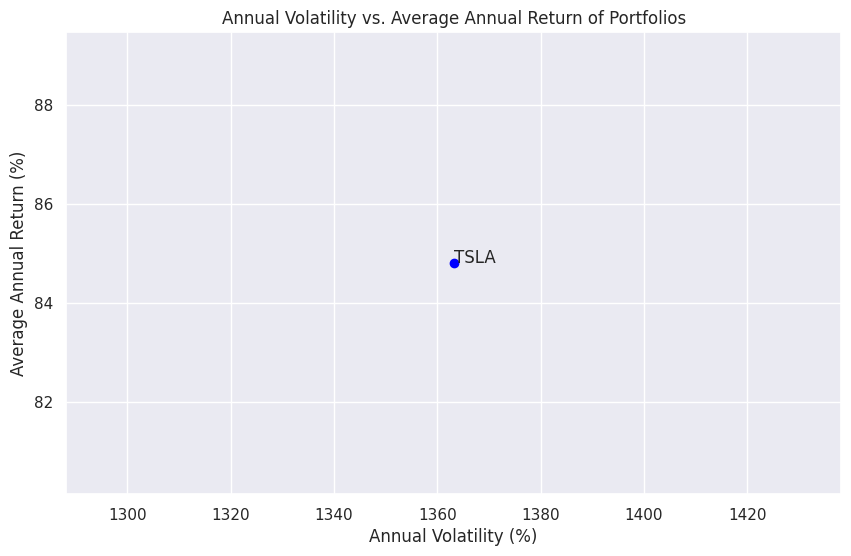


Tabelle der Jahresrenditen und der durchschnittlichen Jahresrendite:
                          TSLA
Date                          
2015-12-31 00:00:00   0.079133
2016-12-31 00:00:00  -0.109662
2017-12-31 00:00:00   0.457017
2018-12-31 00:00:00   0.068894
2019-12-31 00:00:00   0.257001
2020-12-31 00:00:00  41.171850
2021-12-31 00:00:00   0.497556
2022-12-31 00:00:00   0.049055
2023-12-31 00:00:00   1.017211
Durchschnitt         84.800091


In [62]:
#Rendite vs Volatilität


# Datumsspalte in datetime umwandeln und Zeitzoneninformationen entfernen
Minh_df['Date'] = pd.to_datetime(Minh_df['Date'], utc=True).dt.tz_convert(None)
# Anzahl der Portfolios eingeben
num_portfolios = int(input("Wie viele Portfolios möchten Sie anlegen? "))

# Eingabe des Start- und Enddatums
start_date_str = input("Geben Sie das Startdatum der Simulation ein (YYYY-MM-DD): ")
end_date_str = input("Geben Sie das Enddatum der Simulation ein (YYYY-MM-DD): ")

# Konvertierung der Eingabe in datetime-Objekte
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

# Portfolios initialisieren
portfolios = {}

for i in range(num_portfolios):
    portfolio_name = input(f"Geben Sie den Namen für Portfolio {i + 1} ein: ")
    tickers = input(f"Geben Sie die Ticker-Symbole für {portfolio_name} ein (getrennt durch Kommata): ").split(',')
    weight_type = input("Möchten Sie Ihr Portfolio gleichgewichten (G) oder individuell gewichten (I)? ").strip().upper()

    if weight_type == 'I':
        weights = []
        for ticker in tickers:
            weight = float(input(f"Geben Sie das Gewicht für {ticker} in Prozent ein (z.B. 20 für 20%): ")) / 100
            weights.append(weight)
        portfolios[portfolio_name] = {
            'tickers': [ticker.strip().upper() for ticker in tickers],  # Tickers aufräumen und Großbuchstaben verwenden
            'weights': weights
        }
    else:
        # Gleichgewichtung
        portfolios[portfolio_name] = {
            'tickers': [ticker.strip().upper() for ticker in tickers],
            'weights': [1/len(tickers)] * len(tickers)
        }

# Ergebnis-DataFrame initialisieren
portfolio_values = pd.DataFrame()

# Schleife über jedes Portfolio
for portfolio_name, portfolio_info in portfolios.items():
    tickers = portfolio_info['tickers']
    weights = portfolio_info['weights']

    # Filtere die Daten für die ausgewählten Aktien und den Zeitraum
    filtered_data = Minh_df[(Minh_df['Ticker'].isin(tickers)) &
                            (Minh_df['Date'] >= start_date) &
                            (Minh_df['Date'] <= end_date)]

    # Sortiere nach Datum und Ticker
    filtered_data = filtered_data.sort_values(by=['Date', 'Ticker'])

    # Berechne die Anzahl der Aktien, die zum Startdatum gekauft werden
    initial_prices = filtered_data[filtered_data['Date'] == filtered_data['Date'].min()].set_index('Ticker')['Close']
    shares_owned = (100000 * pd.Series(weights, index=tickers)) / initial_prices

    # Berechne den Portfolio-Wert über den Zeitraum, berücksichtige Stock Splits
    portfolio_values_df = []

    for date, group in filtered_data.groupby('Date'):
        # Überprüfe auf Stock Splits und aktualisiere die Anzahl der Aktien entsprechend
        for ticker in tickers:
            stock_split = group[group['Ticker'] == ticker]['Stock Splits'].values
            if len(stock_split) > 0 and stock_split[0] > 0:  # Wenn ein Stock Split stattgefunden hat
                shares_owned[ticker] *= stock_split[0]  # Erhöhe die Anzahl der Aktien entsprechend dem Split-Verhältnis

        # Berechne den aktuellen Portfolio-Wert
        current_prices = group.set_index('Ticker')['Close']
        portfolio_value = (shares_owned * current_prices).sum()
        portfolio_values_df.append({'Date': date, portfolio_name: portfolio_value})

    # DataFrame für das aktuelle Portfolio erstellen und zum Ergebnis hinzufügen
    portfolio_df = pd.DataFrame(portfolio_values_df)
    portfolio_df.set_index('Date', inplace=True)

    # Füge die Portfoliowerte zum Haupt-DataFrame hinzu
    if portfolio_values.empty:
        portfolio_values = portfolio_df
    else:
        portfolio_values = portfolio_values.join(portfolio_df)

# Berechne die jährlichen Renditen für jedes Portfolio
annual_returns = portfolio_values.resample('Y').last().pct_change().dropna()

# Berechne die durchschnittliche jährliche Volatilität und Rendite für jedes Portfolio
volatility = {}
average_returns = {}

for portfolio_name in portfolio_values.columns:
    # Berechne die jährliche Volatilität (Standardabweichung der jährlichen Renditen)
    volatility[portfolio_name] = annual_returns[portfolio_name].std() * 100  # In Prozent umwandeln

    # Berechne die durchschnittliche jährliche Rendite (geometrisches Mittel der jährlichen Renditen)
    cumulative_return = (1 + annual_returns[portfolio_name]).prod() - 1
    num_years = len(annual_returns)
    average_return = (1 + cumulative_return) ** (1 / num_years) - 1
    average_returns[portfolio_name] = average_return * 100  # In Prozent umwandeln

# Erstelle den Scatter-Plot
plt.figure(figsize=(10, 6))
plt.scatter(volatility.values(), average_returns.values(), color='blue')

# Beschrifte die Punkte mit den Portfolionamen
for portfolio_name in portfolios.keys():
    plt.text(volatility[portfolio_name], average_returns[portfolio_name], portfolio_name, fontsize=12)

plt.title('Annual Volatility vs. Average Annual Return of Portfolios')
plt.xlabel('Annual Volatility (%)')
plt.ylabel('Average Annual Return (%)')
plt.grid(True)
plt.show()

summary_table = annual_returns.copy()
summary_table.loc['Durchschnitt'] = pd.Series(average_returns)

# Tabelle anzeigen
print("\nTabelle der Jahresrenditen und der durchschnittlichen Jahresrendite:")
print(summary_table)



### 2.3 Data Analysis (Ascan)

Question 1: What are the average yearly returns of the indurstries between 01.01.2014 and 01.01.2024?

In [63]:
# Gruppieren der Daten nach 'Industry_Tag' und Entfernen doppelter 'Brand_Name'-Einträge
unique_industry_to_brands = Minh_df.groupby('Industry_Tag')['Brand_Name'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Ausgabe der Industry-Tags und ihrer zugehörigen Aktien direkt ohne Liste
for _, row in unique_industry_to_brands.iterrows():
    print(f"{row['Industry_Tag']}: {row['Brand_Name']}")

apparel: adidas, american eagle outfitters, nike, puma
automotive: bmw group, honda, porsche, tesla, toyota
aviation: delta air lines, southwest airlines
consumer goods: colgate palmolive, procter & gamble, unilever
cryptocurrency: coinbase
e-commerce: amazon, shopify
entertainment: netflix, the walt disney company
finance: american express, jpmorgan chase & co, mastercard, visa
financial services: block
fitness: peloton
food: chipotle, mcdonald's
food & beverage: hershey company, starbucks, the coca-cola company
footwear: crocs, foot locker
gaming: nintendo, roblox, ubisoft
healthcare: johnson & johnson
hospitality: airbnb, hilton, marriott
logistics: fedex
luxury goods: lvmh
manufacturing: 3m
music: spotify
retail: costco, nordstrom, target, the home depot
social media: pinterest
technology: adobe, amd, apple, cisco, google, logitech, microsoft, nvidia, philips, salesforce / slack, uber, zoom video communications, zoominfo


          Industry_Tag  Average_Annual_Return
0              apparel               0.053348
1           automotive               0.051022
2             aviation              -0.015072
3       consumer goods               0.039055
4       cryptocurrency              -0.084853
5           e-commerce               0.265591
6        entertainment               0.140844
7              finance               0.125272
8   financial services               0.481538
9              fitness              -0.167815
10                food               0.087253
11     food & beverage               0.053781
12            footwear               0.077066
13              gaming               0.203113
14          healthcare               0.032888
15         hospitality               0.149161
16           logistics               0.034889
17        luxury goods               0.153341
18       manufacturing              -0.042237
19               music               0.089004
20              retail            

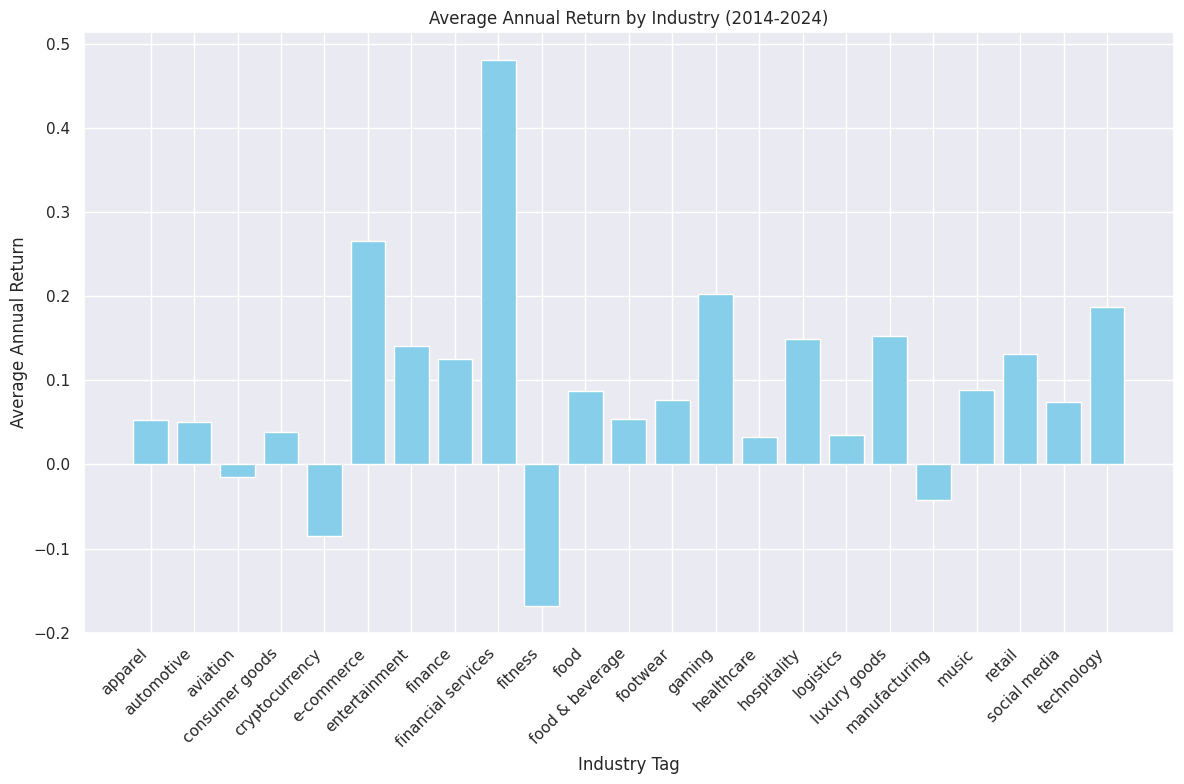

In [64]:
#eine Branche entspricht ein gleichgewichtetes Aktienportfolio

# Sicherstellen, dass die 'Date'-Spalte als datetime-Objekt mit UTC-Zeit konvertiert wird
Minh_df['Date'] = pd.to_datetime(Minh_df['Date'], errors='coerce', utc=True)

# Entfernen der Zeitzoneninformationen
Minh_df['Date'] = Minh_df['Date'].dt.tz_localize(None)

# Filtern der Daten ab dem 01.01.2014
filtered_data = Minh_df[Minh_df['Date'] >= pd.Timestamp('2014-01-01')].copy()

# Extrahieren des Jahres
filtered_data['Year'] = filtered_data['Date'].dt.year

# Berechnen des jährlichen Portfolio-Endwerts für jede Industrie (angenommen, alle Aktien sind gleichgewichtet)
yearly_portfolio_values = filtered_data.groupby(['Industry_Tag', 'Year']).agg({'Close': 'sum'}).reset_index()

# Berechnen der Jahresrendite für jede Industrie
yearly_portfolio_values['Annual_Return'] = yearly_portfolio_values.groupby('Industry_Tag')['Close'].pct_change()

# Entfernen von NaN-Werten, die durch pct_change() im ersten Jahr entstehen
yearly_portfolio_values = yearly_portfolio_values.dropna()

# Berechnung der durchschnittlichen Jahresrendite über den gesamten Zeitraum für jede Industrie
def geometric_mean(returns):
    return np.prod(1 + returns) ** (1 / len(returns)) - 1

average_annual_returns = yearly_portfolio_values.groupby('Industry_Tag').agg(
    Average_Annual_Return=('Annual_Return', geometric_mean)
).reset_index()

# Ausgabe der durchschnittlichen Jahresrendite für jede Industrie
print(average_annual_returns)

# Visualisierung der durchschnittlichen Jahresrenditen
plt.figure(figsize=(12, 8))
plt.bar(average_annual_returns['Industry_Tag'], average_annual_returns['Average_Annual_Return'], color='skyblue')
plt.xlabel('Industry Tag')
plt.ylabel('Average Annual Return')
plt.title('Average Annual Return by Industry (2014-2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Question 2: What's the average volatility of each industry between 01.01.2014 and 01.01.2024?

          Industry_Tag  Volatility
0              apparel    0.206918
1           automotive    0.186279
2             aviation    0.176453
3       consumer goods    0.075846
4       cryptocurrency    0.501692
5           e-commerce    0.309940
6        entertainment    0.216774
7              finance    0.126624
8   financial services    1.328308
9              fitness    2.139608
10                food    0.242556
11     food & beverage    0.115900
12            footwear    0.294355
13              gaming    0.505742
14          healthcare    0.099188
15         hospitality    0.250040
16           logistics    0.195287
17        luxury goods    0.218505
18       manufacturing    0.170978
19               music    0.290688
20              retail    0.132719
21        social media    0.485384
22          technology    0.224095


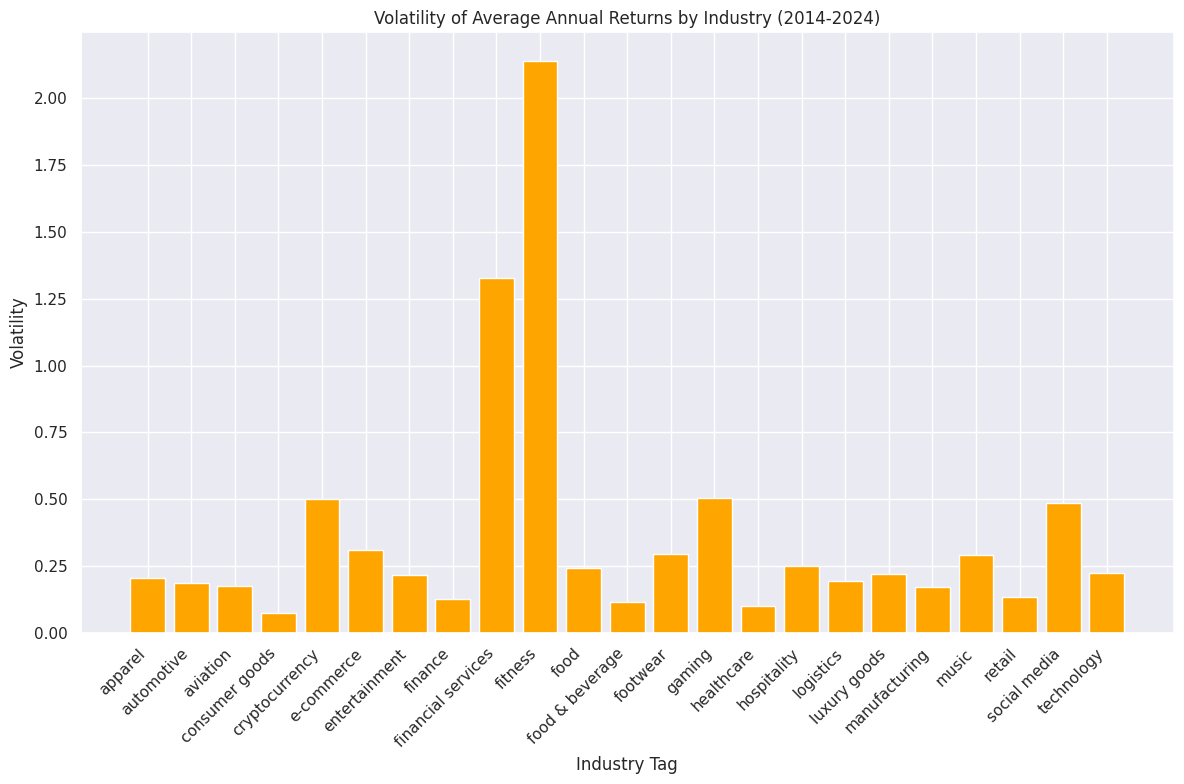

In [65]:


# Filtern der Daten ab dem 01.01.2014
filtered_data = Minh_df[Minh_df['Date'] >= pd.Timestamp('2014-01-01')].copy()

# Extrahieren des Jahres
filtered_data['Year'] = filtered_data['Date'].dt.year

# Berechnen des jährlichen Portfolio-Endwerts für jede Industrie (angenommen, alle Aktien sind gleichgewichtet)
yearly_portfolio_values = filtered_data.groupby(['Industry_Tag', 'Year']).agg({'Close': 'sum'}).reset_index()

# Berechnen der Jahresrendite für jede Industrie
yearly_portfolio_values['Annual_Return'] = yearly_portfolio_values.groupby('Industry_Tag')['Close'].pct_change()

# Entfernen von NaN-Werten, die durch pct_change() im ersten Jahr entstehen
yearly_portfolio_values = yearly_portfolio_values.dropna()

# Berechnung der durchschnittlichen Jahresrendite über den gesamten Zeitraum für jede Industrie
def geometric_mean(returns):
    return np.prod(1 + returns) ** (1 / len(returns)) - 1

average_annual_returns = yearly_portfolio_values.groupby('Industry_Tag').agg(
    Average_Annual_Return=('Annual_Return', geometric_mean)
).reset_index()

# Berechnen der Volatilität (Durchschnittliche Abweichung von der durchschnittlichen Jahresrendite)
merged_data = yearly_portfolio_values.merge(average_annual_returns, on='Industry_Tag', suffixes=('', '_mean'))

# Berechnen der absoluten Abweichung
merged_data['Deviation'] = abs(merged_data['Annual_Return'] - merged_data['Average_Annual_Return'])

# Berechnen der durchschnittlichen Abweichung (Volatilität)
volatility = merged_data.groupby('Industry_Tag').agg(
    Volatility=('Deviation', 'mean')
).reset_index()

# Ausgabe der Volatilität für jede Industrie
print(volatility)



# Visualisierung der Volatilität der verschiedenen Industrien
plt.figure(figsize=(12, 8))
plt.bar(volatility['Industry_Tag'], volatility['Volatility'], color='orange')
plt.xlabel('Industry Tag')
plt.ylabel('Volatility')
plt.title('Volatility of Average Annual Returns by Industry (2014-2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Question 3: What is the performance between the top 10 stocks with the highest trading volume and the bottom 10 with the lowest trading volume?

In [66]:
pd.set_option('display.max_rows', None)
# Berechnung des durchschnittlichen täglichen Handelsvolumens pro Aktie
average_daily_volume = filtered_data.groupby('Ticker')['Volume'].mean().reset_index()

# Sortierung nach dem durchschnittlichen täglichen Handelsvolumen in absteigender Reihenfolge
sorted_volume = average_daily_volume.sort_values(by='Volume', ascending=False).reset_index(drop=True)

# Ausgabe der sortierten Tabelle
print(sorted_volume)

   Ticker        Volume
0    AAPL  1.317133e+08
1    TSLA  1.121909e+08
2    NVDA  8.145628e+07
3    AMZN  7.776343e+07
4     AMD  5.538960e+07
5   GOOGL  3.708761e+07
6    MSFT  2.953018e+07
7    UBER  2.437735e+07
8    CSCO  2.320772e+07
9    SHOP  1.703328e+07
10    JPM  1.425294e+07
11     KO  1.417133e+07
12   RBLX  1.415521e+07
13   PTON  1.301362e+07
14   PINS  1.204420e+07
15    DAL  1.186174e+07
16   COIN  1.089469e+07
17     SQ  1.060683e+07
18   NFLX  1.005154e+07
19    DIS  1.004133e+07
20   SBUX  8.936411e+06
21      V  8.488001e+06
22     PG  8.151806e+06
23    NKE  8.015672e+06
24    JNJ  7.716747e+06
25    LUV  7.332478e+06
26   ABNB  6.255729e+06
27    CRM  5.950902e+06
28    TGT  5.078619e+06
29    AEO  5.074379e+06
30     ZM  5.022898e+06
31     HD  4.600432e+06
32     ZI  4.596945e+06
33    AXP  4.093333e+06
34    MCD  4.022857e+06
35    JWN  3.961827e+06
36     CL  3.909512e+06
37     MA  3.832062e+06
38    MMM  3.019167e+06
39   ADBE  2.973597e+06
40     FL  2.798

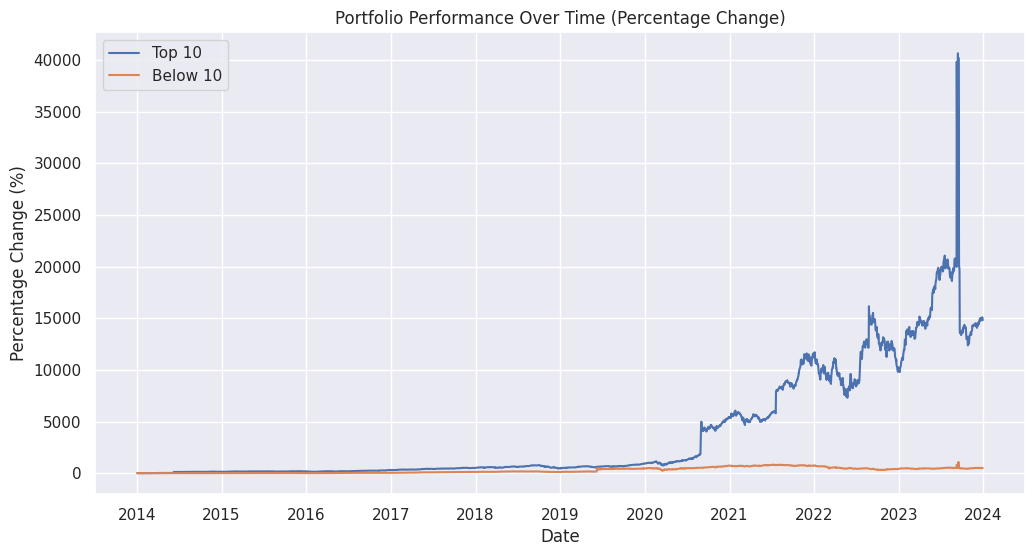

In [68]:
# Datumsspalte in datetime umwandeln und Zeitzoneninformationen entfernen
Minh_df['Date'] = pd.to_datetime(Minh_df['Date'], utc=True).dt.tz_convert(None)

# Feste Portfolios definieren
portfolios = {
    'Top 10': {
        'tickers': ['AAPL', 'TSLA', 'NVDA', 'AMZN', 'AMD', 'GOOGL', 'MSFT', 'UBER', 'CSCO', 'SHOP'],
        'weights': [1/10] * 10  # Gleichgewichtung
    },
    'Below 10': {
        'tickers': ['CMG', 'HM', 'LOGI', 'TM', 'POAHY', 'LVMUY', 'UBSFY', 'ADDYY', 'BAMXF', 'PMMAF'],
        'weights': [1/10] * 10  # Gleichgewichtung
    }
}

# Eingabe des festen Start- und Enddatums
start_date = datetime(2014, 1, 1)
end_date = datetime(2024, 1, 1)

# Ergebnis-DataFrame initialisieren
results = pd.DataFrame()

# Schleife über jedes Portfolio
for portfolio_name, portfolio_info in portfolios.items():
    tickers = portfolio_info['tickers']
    weights = portfolio_info['weights']

    # Filtere die Daten für die ausgewählten Aktien und den Zeitraum
    filtered_data = Minh_df[(Minh_df['Ticker'].isin(tickers)) &
                            (Minh_df['Date'] >= start_date) &
                            (Minh_df['Date'] <= end_date)]

    # Sortiere nach Datum und Ticker
    filtered_data = filtered_data.sort_values(by=['Date', 'Ticker'])

    # Berechne die Anzahl der Aktien, die zum Startdatum gekauft werden
    initial_prices = filtered_data[filtered_data['Date'] == filtered_data['Date'].min()].set_index('Ticker')['Close']
    shares_owned = (100000 * pd.Series(weights, index=tickers)) / initial_prices

    # Berechne den Portfolio-Wert über den Zeitraum, berücksichtige Stock Splits und reinvestiere Dividenden
    portfolio_values = []

    for date, group in filtered_data.groupby('Date'):
        # Überprüfe auf Stock Splits und aktualisiere die Anzahl der Aktien entsprechend
        for ticker in tickers:
            stock_split = group[group['Ticker'] == ticker]['Stock Splits'].values
            if len(stock_split) > 0 and stock_split[0] > 0:  # Wenn ein Stock Split stattgefunden hat
                shares_owned[ticker] *= stock_split[0]  # Erhöhe die Anzahl der Aktien entsprechend dem Split-Verhältnis

            # Reinvestiere Dividenden
            dividends = group[group['Ticker'] == ticker]['Dividends'].values
            if len(dividends) > 0 and dividends[0] > 0:  # Wenn eine Dividende ausgeschüttet wurde
                # Dividende berechnen und wieder in die Aktie investieren
                total_dividends = shares_owned[ticker] * dividends[0]
                additional_shares = total_dividends / group[group['Ticker'] == ticker]['Close'].values[0]
                shares_owned[ticker] += additional_shares  # Erhöhe die Anzahl der Aktien durch Dividenden-Reinvestition

        # Berechne den aktuellen Portfolio-Wert
        current_prices = group.set_index('Ticker')['Close']
        portfolio_value = (shares_owned * current_prices).sum()
        portfolio_values.append({'Date': date, portfolio_name: portfolio_value})

    # DataFrame für das aktuelle Portfolio erstellen und zum Ergebnis hinzufügen
    portfolio_df = pd.DataFrame(portfolio_values)

    # Sicherstellen, dass die 'Date'-Spalte als Index gesetzt wird
    if 'Date' in portfolio_df.columns:
        portfolio_df.set_index('Date', inplace=True)
    else:
        print(f"Fehler: Die 'Date'-Spalte ist nicht im DataFrame für {portfolio_name} vorhanden.")

    # Berechne die prozentuale Veränderung relativ zum Startwert
    portfolio_df[f'{portfolio_name} Pct Change'] = (portfolio_df[portfolio_name] / portfolio_df[portfolio_name].iloc[0] - 1) * 100

    # Füge die prozentuale Veränderung zu den Ergebnissen hinzu
    if results.empty:
        results = portfolio_df[[f'{portfolio_name} Pct Change']]
    else:
        results = results.join(portfolio_df[[f'{portfolio_name} Pct Change']])

# Performance anzeigen für alle Portfolios
plt.figure(figsize=(12, 6))
for portfolio_name in portfolios.keys():
    plt.plot(results.index, results[f'{portfolio_name} Pct Change'], label=portfolio_name)

plt.title('Portfolio Performance Over Time (Percentage Change)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.show()


### 2.3 Data Analysis (Sayed)




1.   Listeneintrag
2.   Listeneintrag



In [73]:
# Define the list of good industries
good_industries = ['environment', 'technology', 'healthcare', 'renewable energy']


In [74]:
# Filter the dataset for good and other industries
good_companies = df[data['Industry_Tag'].isin(good_industries)]
other_companies = df[~data['Industry_Tag'].isin(good_industries)]

<ipython-input-74-f93657975911>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_companies = df[data['Industry_Tag'].isin(good_industries)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

### 2.3 Data Analysis (Shirose)

1. Which companies have the highest return over the entire observation period?

Positive returns:
Brand_Name
peloton     468.653400
zoominfo    249.794229
coinbase     72.597268
roblox       57.489233
airbnb       23.126017
Name: Close, dtype: float64

Negative returns:
Brand_Name
zoom video communications   -12.293114
porsche                     -15.719610
chipotle                    -21.104537
pinterest                   -21.969942
cisco                       -24.780488
ubisoft                     -29.937736
philips                     -37.533406
puma                        -39.178312
uber                        -42.143353
delta air lines             -54.573598
spotify                     -55.856738
honda                       -57.847313
toyota                      -61.616157
southwest airlines          -66.988807
nordstrom                   -67.461661
nintendo                    -70.743019
the walt disney company     -74.170015
american eagle outfitters   -74.735155
the coca-cola company       -79.398192
bmw group                   -79.759202
block             

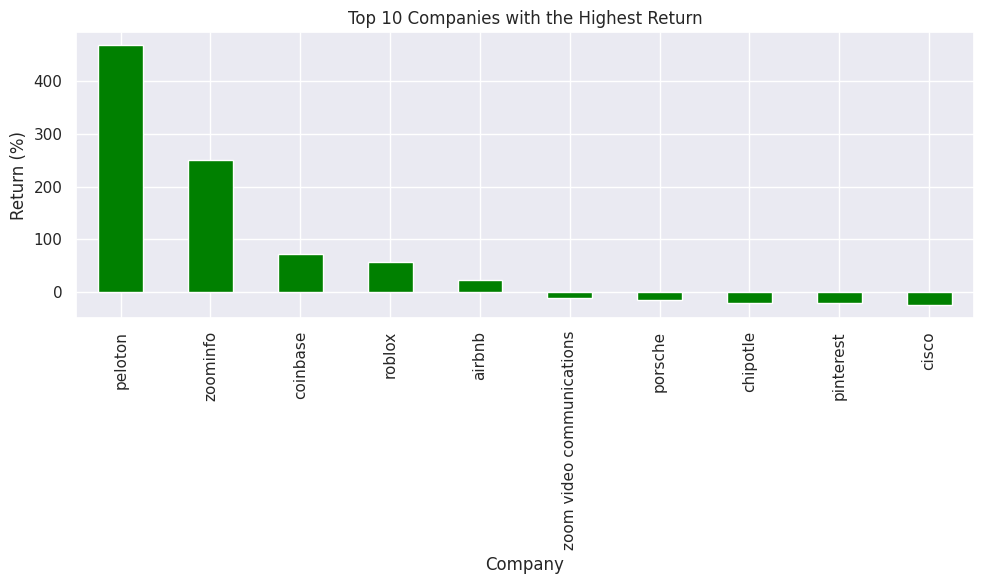

In [71]:
# 1. Which companies have the highest return over the entire observation period?


# Loading the dataset
file_path = '/content/drive/MyDrive/techlabs/data/World-Stock-Prices-Dataset.csv'  # Provide the correct path
stock_data = pd.read_csv(file_path)

# Ensure the 'Date' column is correctly formatted as datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True)

# Calculating returns = (End price - Start price) / Start price
start_prices = stock_data.groupby('Brand_Name')['Close'].first()
end_prices = stock_data.groupby('Brand_Name')['Close'].last()
returns = (end_prices - start_prices) / start_prices * 100

# Sorting the returns
sorted_returns = returns.sort_values(ascending=False)

# Displaying positive and negative returns
positive_returns = sorted_returns[sorted_returns > 0]
negative_returns = sorted_returns[sorted_returns <= 0]

# Output
print("Positive returns:")
print(positive_returns)

print("\nNegative returns:")
print(negative_returns)

# Manual check of returns for specific companies like Airbnb
print("\nStart price and end price for Airbnb:")
print(f"Start price: {start_prices['airbnb']}, End price: {end_prices['airbnb']}")
print(f"Return for Airbnb: {returns['airbnb']}")

# Optional: Plotting the top 10 returns
top_returns = sorted_returns.head(10)
plt.figure(figsize=(10, 6))
top_returns.plot(kind='bar', color='green')
plt.title('Top 10 Companies with the Highest Return')
plt.xlabel('Company')
plt.ylabel('Return (%)')
plt.tight_layout()
plt.show()


2. Impact of COVID-19 Events on Volatility


<ipython-input-72-a7b7ab4f577a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_data['Daily_Return'] = pre_covid_data['Close'].pct_change()
<ipython-input-72-a7b7ab4f577a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['Daily_Return'] = covid_data['Close'].pct_change()


<Figure size 1200x600 with 0 Axes>

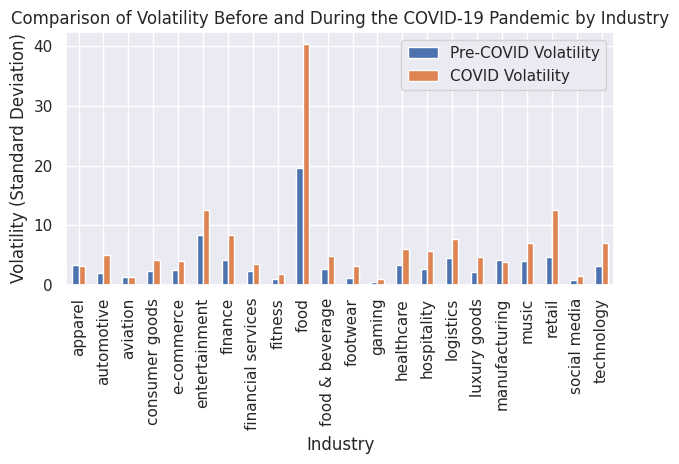

In [72]:
# 2. Impact of COVID-19 Events on Volatility
# Filtering the data by time period: Before the pandemic (2019) and during the pandemic (2020)
pre_covid_data = stock_data[(stock_data['Date'] >= '2019-01-01') & (stock_data['Date'] < '2020-01-01')]
covid_data = stock_data[(stock_data['Date'] >= '2020-01-01')]

# Calculating the daily return for the period before and during the pandemic
pre_covid_data['Daily_Return'] = pre_covid_data['Close'].pct_change()
covid_data['Daily_Return'] = covid_data['Close'].pct_change()

# Calculating volatility (standard deviation of daily returns) for different industries
pre_covid_volatility = pre_covid_data.groupby('Industry_Tag')['Daily_Return'].std()
covid_volatility = covid_data.groupby('Industry_Tag')['Daily_Return'].std()

# Merging the two volatility datasets into a single DataFrame
volatility_comparison = pd.DataFrame({
    'Pre-COVID Volatility': pre_covid_volatility,
    'COVID Volatility': covid_volatility
}).dropna()

# Creating a bar chart to compare volatility before and during the pandemic by industry
plt.figure(figsize=(12, 6))
volatility_comparison.plot(kind='bar')
plt.title('Comparison of Volatility Before and During the COVID-19 Pandemic by Industry')
plt.xlabel('Industry')
plt.ylabel('Volatility (Standard Deviation)')
plt.tight_layout()
plt.show()

### 2.3 Data Analysis (Lars)